In [1]:
import numpy as np
import pandas as pd
import emcee
import corner
from scipy.optimize import minimize
from multiprocessing import Pool
import time
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
sn = 'ZTF18abfhryc'
lc_df = pd.read_hdf("../../forced_lightcurves/sample_lc_v2//{}_force_phot.h5".format(sn))
salt_df = pd.read_csv("../../Nobs_cut_salt2_spec_subtype.csv")

In [4]:
lc_df.columns

Index(['jdobs', 'filter', 'seeing', 'gain', 'zp', 'ezp', 'programid',
       'fieldid', 'ccdid', 'qid', 'filterid', 'moonra', 'moondec', 'moonillf',
       'moonphase', 'airmass', 'nbad', 'nbadbkg', 'bkgstd', 'bkgmed',
       'diffimgname', 'psfimgname', 'Fmcmc', 'Fmcmc_unc', 'Fratio',
       'Fratio_unc', 'jdref_start', 'jdref_end', 'fcqfid', 'scisigpix',
       'offset', 'multiply'],
      dtype='object')

In [5]:
lc_df

jdobs filter  seeing      gain         zp       ezp  programid  \
0    2.458279e+06   b'r'   3.327  5.496403  26.275000  0.000004        1.0   
1    2.458282e+06   b'g'   2.917  5.992315  26.325000  0.000007        1.0   
2    2.458282e+06   b'r'   2.151  5.675842  26.275000  0.000003        1.0   
3    2.458285e+06   b'r'   2.593  4.237173  26.275000  0.000007        1.0   
4    2.458288e+06   b'r'   2.714  5.700298  26.275000  0.000003        1.0   
0    2.458289e+06   b'r'   2.565  6.200000  26.191076  0.000003        2.0   
1    2.458289e+06   b'r'   2.428  6.200000  26.190715  0.000003        2.0   
2    2.458289e+06   b'g'   2.607  6.200000  26.282586  0.000007        2.0   
3    2.458289e+06   b'g'   3.795  6.200000  26.278089  0.000010        2.0   
4    2.458289e+06   b'g'   2.529  6.200000  26.282246  0.000006        2.0   
5    2.458289e+06   b'r'   2.794  6.200000  26.167719  0.000003        2.0   
6    2.458290e+06   b'r'   2.852  6.200000  26.164782  0.000003        2.0   
7    2.458290e+06   b'r'   2.463  6.200000  26.166410  0.000003        2.0   
8    2.458290e+06   b'g'   2.597  6.200000  26.278543  0.000006        2.0   
9    2.458290e+06   b'g'   2.967  6.200000  26.284187  0.000009        2.0   
10   2.458290e+06   b'g'   2.876  6.200000  26.287841  0.000007        2.0   
11   2.458290e+06   b'r'   2.778  6.200000  26.173709  0.000003        2.0   
12   2.458291e+06   b'g'   2.851  6.200000  26.226309  0.000009        2.0   
5    2.458291e+06   b'r'   2.769  6.200000  26.160307  0.000003        1.0   
13   2.458291e+06   b'r'   2.425  6.200000  26.152877  0.000003        2.0   
14   2.458291e+06   b'r'   2.536  6.200000  26.159923  0.000003        2.0   
15   2.458291e+06   b'r'   2.576  6.200000  26.166026  0.000003        2.0   
6    2.458291e+06   b'g'   2.748  6.200000  26.289363  0.000006        1.0   
16   2.458291e+06   b'g'   2.912  6.200000  26.285778  0.000007        2.0   
17   2.458291e+06   b'g'   2.692  6.200000  26.271172  0.000007        2.0   
18   2.458292e+06   b'r'   2.283  6.200000  26.175755  0.000003        2.0   
19   2.458292e+06   b'r'   2.513  6.200000  26.171210  0.000003        2.0   
20   2.458292e+06   b'r'   2.633  6.200000  26.172184  0.000005        2.0   
21   2.458292e+06   b'g'   2.305  6.200000  26.262839  0.000007        2.0   
22   2.458292e+06   b'g'   2.158  6.200000  26.274816  0.000004        2.0   
..            ...    ...     ...       ...        ...       ...        ...   
456  2.458431e+06   b'r'   1.808  6.200000  26.161790  0.000003        2.0   
457  2.458431e+06   b'g'   1.885  6.200000  26.253334  0.000005        2.0   
458  2.458431e+06   b'g'   2.522  6.200000  26.248030  0.000008        2.0   
459  2.458431e+06   b'g'   1.966  6.200000  26.219131  0.000006        2.0   
460  2.458431e+06   b'r'   2.737  6.200000  26.148772  0.000005        2.0   
461  2.458431e+06   b'r'   2.239  6.200000  26.129734  0.000004        2.0   
462  2.458432e+06   b'g'   3.451  6.200000  26.206599  0.000019        2.0   
464  2.458432e+06   b'g'   2.980  6.200000  26.202327  0.000010        2.0   
465  2.458432e+06   b'r'   3.238  6.200000  26.117933  0.000007        2.0   
466  2.458432e+06   b'r'   3.728  6.200000  26.122981  0.000010        2.0   
468  2.458433e+06   b'r'   3.032  6.200000  26.151913  0.000006        2.0   
64   2.458433e+06   b'r'   2.751  6.200000  26.148671  0.000005        1.0   
469  2.458433e+06   b'r'   3.085  6.200000  26.142608  0.000007        2.0   
470  2.458433e+06   b'g'   3.485  6.200000  26.199376  0.000013        2.0   
471  2.458433e+06   b'g'   3.381  6.200000  26.176200  0.000014        2.0   
472  2.458434e+06   b'r'   2.120  6.200000  25.875312  0.000007        2.0   
473  2.458434e+06   b'r'   2.075  6.200000  25.838860  0.000005        2.0   
474  2.458434e+06   b'r'   1.904  6.200000  25.864729  0.000005        2.0   
475  2.458434e+06   b'g'   2.611  6.200000  25.457874  0.000016        2.0   
476  2.458434e+06   b'g'   3.518  

<IPython.core.display.Javascript object>


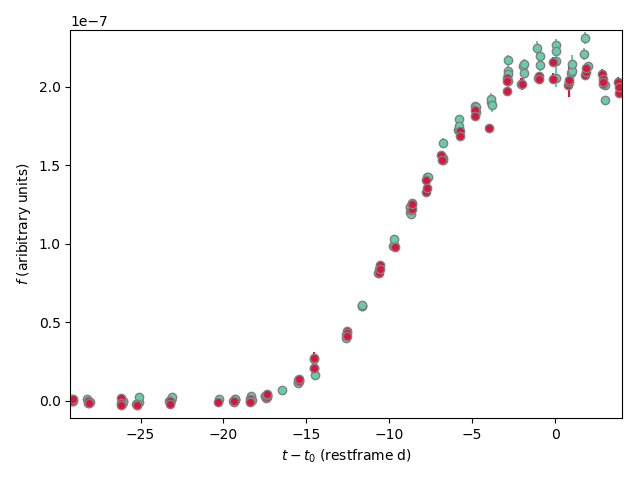

In [11]:
g_obs = np.where((lc_df['offset'] > -999) & 
                 (lc_df['filter'] == b'g'))
r_obs = np.where((lc_df['offset'] > -999) & 
                 (lc_df['filter'] == b'r'))
obs = np.where( (lc_df['offset'] > -999)  
              )

t0 = float(salt_df['t0_g_adopted'][salt_df['name'] == sn].values)
z = float(salt_df['z_adopt'][salt_df['name'] == sn].values)

fig, ax = plt.subplots()
ax.errorbar((lc_df['jdobs'].iloc[g_obs] - t0)/(1+z), 
            lc_df['Fratio'].iloc[g_obs],
            lc_df['Fratio_unc'].iloc[g_obs], 
            fmt = 'o', color='MediumAquaMarine',
            mec='0.5')
ax.errorbar((lc_df['jdobs'].iloc[r_obs] - t0)/(1+z), 
            lc_df['Fratio'].iloc[r_obs],
            lc_df['Fratio_unc'].iloc[r_obs], 
            fmt = 'o', color='Crimson',
            mec='0.5')
ax.set_xlabel('$t - t_0 \; (\mathrm{restframe \; d})$')
ax.set_ylabel('$f \; (\mathrm{aribitrary \; units})$')
fig.tight_layout()

In [12]:
def f_t(times, amplitude=25, t_0=0, alpha_r=2):
    
    return amplitude * (times - t_0)**alpha_r

In [13]:
def plot_model(t, f, f_unc, theta):
    half_max = np.where((f < 0.5) & (t < 0))
    
    t_post = np.linspace(theta[0], 80, 1000)
    t_pre = np.linspace(min(t), theta[0], 1000)
    model_flux = theta[1] + f_t(t_post, theta[2], theta[0], theta[3])
    fig = plt.figure()
    axPlot = plt.axes([0.15, 0.37, 0.85, 0.61])
    axRes = plt.axes([0.15, 0.1, 0.85, 0.25])
    axPlot.errorbar(t, f, f_unc,
                fmt = 'o', color='MediumAquaMarine',
                mec='0.5')
    axPlot.plot(t_post, model_flux, 'k', zorder=10)
    axPlot.plot(t_pre, np.ones_like(t_pre)*theta[1], 'k', zorder=10)
    axPlot.plot([max(t[half_max]),max(t[half_max])], [-50,50], 
               '--', color='DarkOrange')
    axPlot.set_xlim(min(t), 3)
    axPlot.set_ylim(min(f), 1.1)

    after_exp = t >= theta[0]
    
    residuals = np.append(f[~after_exp] - theta[1], 
                          f[after_exp] - (theta[1] + f_t(t[after_exp], theta[2], theta[0], theta[3]))  
                         )
    
    axRes.errorbar(t, residuals, f_unc,
                   fmt = 'o', color='MediumAquaMarine',
                   mec='0.5')
    axRes.plot([-5000,10000], [0,0], 'k--')
    axRes.plot([max(t[half_max]),max(t[half_max])], [-50,50], 
               '--', color='DarkOrange')
    axRes.set_xlim(min(t), 3)


    axRes.set_ylim(min(residuals[half_max]), max(residuals[half_max]))
    axRes.set_xlabel('$t - t_0 \; (\mathrm{restframe \; d})$')
    axPlot.set_ylabel('$f \; (\mathrm{aribitrary \; units})$')
#     fig.tight_layout()
    
    return

In [14]:
def lnlike_simple(theta, f, t, f_err):
    t_0, a, a_prime, alpha_r = theta
    
    pre_exp = np.logical_not(t > t_0)
    model = np.empty_like(f)
    model[pre_exp] = a
    
    time_term = (t[~pre_exp] - t_0)
    model[~pre_exp] = a + a_prime * (time_term)**alpha_r
    
    ln_l = -0.5*np.sum((f - model)**2 / (f_err**2))
    return ln_l

def nll_simple(theta, f, t, f_err):
    return -1*lnlike_simple(theta, f, t, f_err)

#Define priors on parameters  
def lnprior_simple(theta):
    t_0, a, a_prime, alpha_r = theta
    if (-1e8 < t_0 < 1e8 and 0 < alpha_r < 1e8 and 
        -1e8 < a < 1e8 and 
        0 < a_prime < 1e8):
        return 0.0
    return -np.inf

def lnposterior_simple(theta, f, t, f_err):
    lnp = lnprior_simple(theta)
    lnl = lnlike_simple(theta, f, t, f_err)
    if not np.isfinite(lnl):
        return -np.inf
    if not np.isfinite(lnp):
        return -np.inf
    return lnl + lnp

In [15]:
time_jd = (lc_df['jdobs'].iloc[r_obs].values - t0)/(1+z)
max_flux = np.max(lc_df['Fratio'].iloc[r_obs].values)
# normalize flux as units are arbitrary and 
# we marginalize over the amplitude anyway
flux = lc_df['Fratio'].iloc[r_obs].values/max_flux
flux_unc = lc_df['Fratio_unc'].iloc[r_obs].values/max_flux
t_fl = 16.5

guess_0 = [-t_fl, 0, 6e-3, 2]

half_max = np.where((flux < 0.25) & (time_jd < 0))
f_data = flux[half_max]
t_data = time_jd[half_max]
f_unc_data = flux_unc[half_max]

In [16]:
# initialize near maximum-likelihood result
ml_res = minimize(nll_simple, guess_0, method='Powell', # Powell method does not need derivatives
                  args=(f_data, t_data, f_unc_data))
ml_guess = ml_res.x
print(ml_guess)
print(nll_simple(ml_guess, f_data, t_data, f_unc_data))

[-1.91738422e+01 -1.66494997e-03  4.92591473e-03  1.95926819e+00]
22.529032681739416


<IPython.core.display.Javascript object>


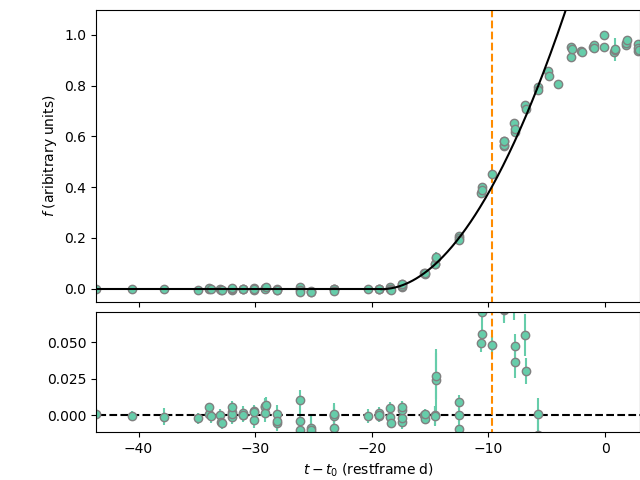

In [17]:
plot_model(time_jd, flux, flux_unc,
           ml_guess)

In [ ]:
###################################
###  sample without sig_0 term  ###
###################################


nwalkers = 250
ndim = len(ml_guess)
nfac = [1e-2]*ndim

#initial position of walkers
pos = [ml_guess + ml_guess * nfac * np.random.randn(ndim) for i in range(nwalkers)]
# pos = [[-16.7, 0, 0.01, 2] + nfac * np.random.randn(ndim) for i in range(nwalkers)]

with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnposterior_simple, 
                                    args=(f_data, t_data, f_unc_data),
                                    pool=pool)
    max_samples = 50000
    index = 0
    autocorr = np.empty(max_samples)
    old_tau = np.inf
    check_tau = 2500
    for sample in sampler.sample(pos, iterations=max_samples, progress=True):
        if sampler.iteration % check_tau:
            continue
        
        tstart = time.time()
        tau = sampler.get_autocorr_time(tol=0)
        tend = time.time()
        autocorr[index] = np.mean(tau)
        index += 1
        steps_so_far = index*check_tau
        print('''After {:d} steps, 
autocorrelation takes {:.3f} s ({} total FFTs)                
acceptance fraction = {:.4f}, and
tau = {}'''.format(steps_so_far, 
                   tend-tstart, nwalkers*ndim,
                   np.mean(sampler.acceptance_fraction), 
                   tau))

        # Check convergence
        converged = np.all(tau * 100 < sampler.iteration)
        converged &= np.all(np.abs(old_tau - tau) / tau < 0.01)
        if converged:
            break
        old_tau = tau

  5%|▌         | 2521/50000 [00:18<08:32, 92.62it/s] 

After 2500 steps, 
autocorrelation takes 0.198 s (1000 total FFTs)                
acceptance fraction = 0.3284, and
tau = [208.80586443  84.62174679 212.1715407  213.20906572]


 10%|█         | 5015/50000 [00:36<11:28, 65.30it/s] 

After 5000 steps, 
autocorrelation takes 0.409 s (1000 total FFTs)                
acceptance fraction = 0.2932, and
tau = [380.51341614 114.45337515 378.72164694 389.86770381]


 11%|█▏        | 5665/50000 [12:01:41<13970:39:22, 1134.42s/it]

<IPython.core.display.Javascript object>


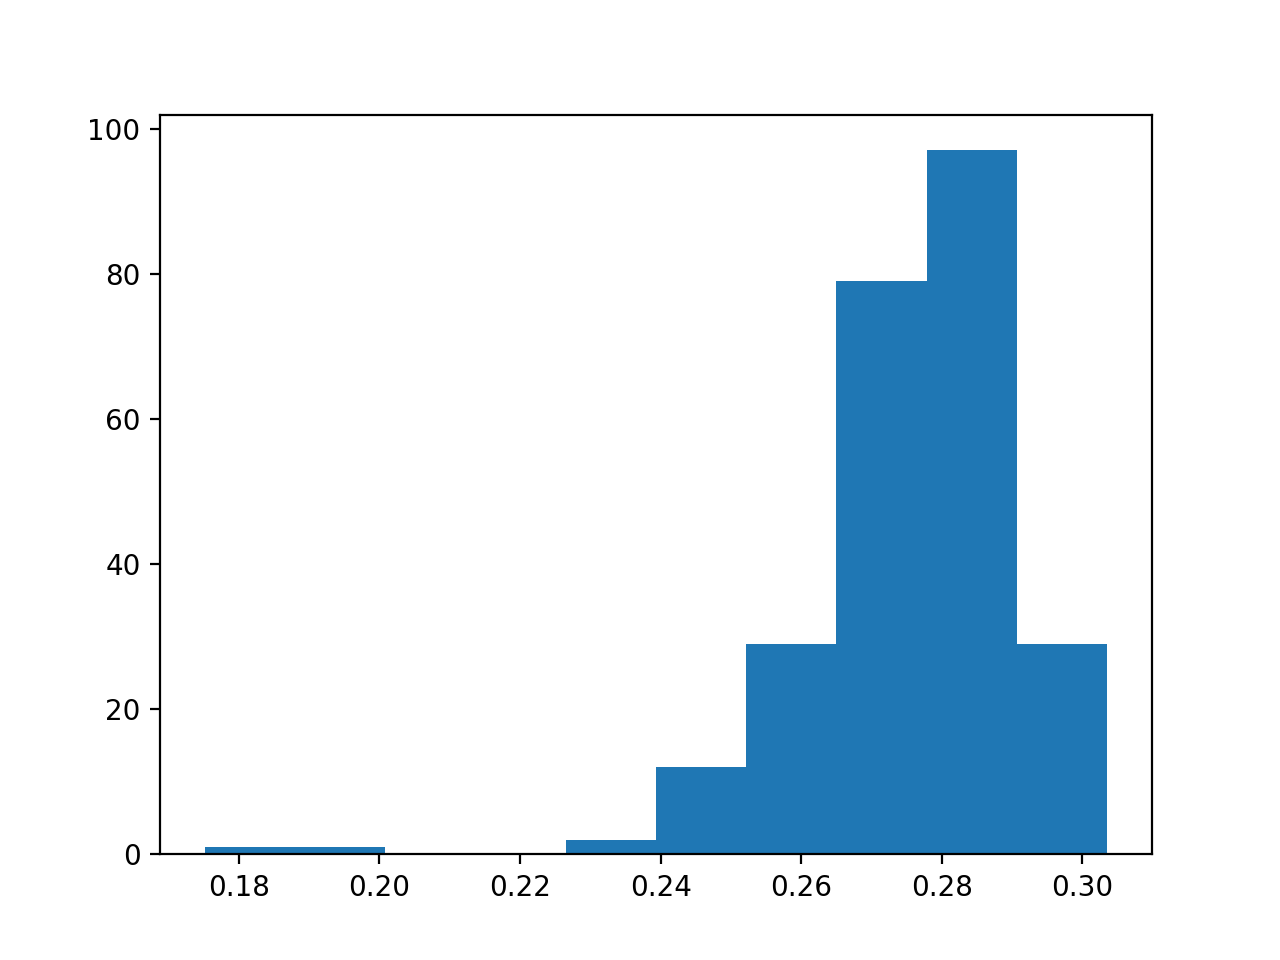

(array([ 1.,  1.,  0.,  0.,  2., 12., 29., 79., 97., 29.]),
 array([0.1752  , 0.188028, 0.200856, 0.213684, 0.226512, 0.23934 ,
        0.252168, 0.264996, 0.277824, 0.290652, 0.30348 ]),
 <a list of 10 Patch objects>)

In [127]:
plt.figure()
plt.hist(sampler.acceptance_fraction)

<IPython.core.display.Javascript object>


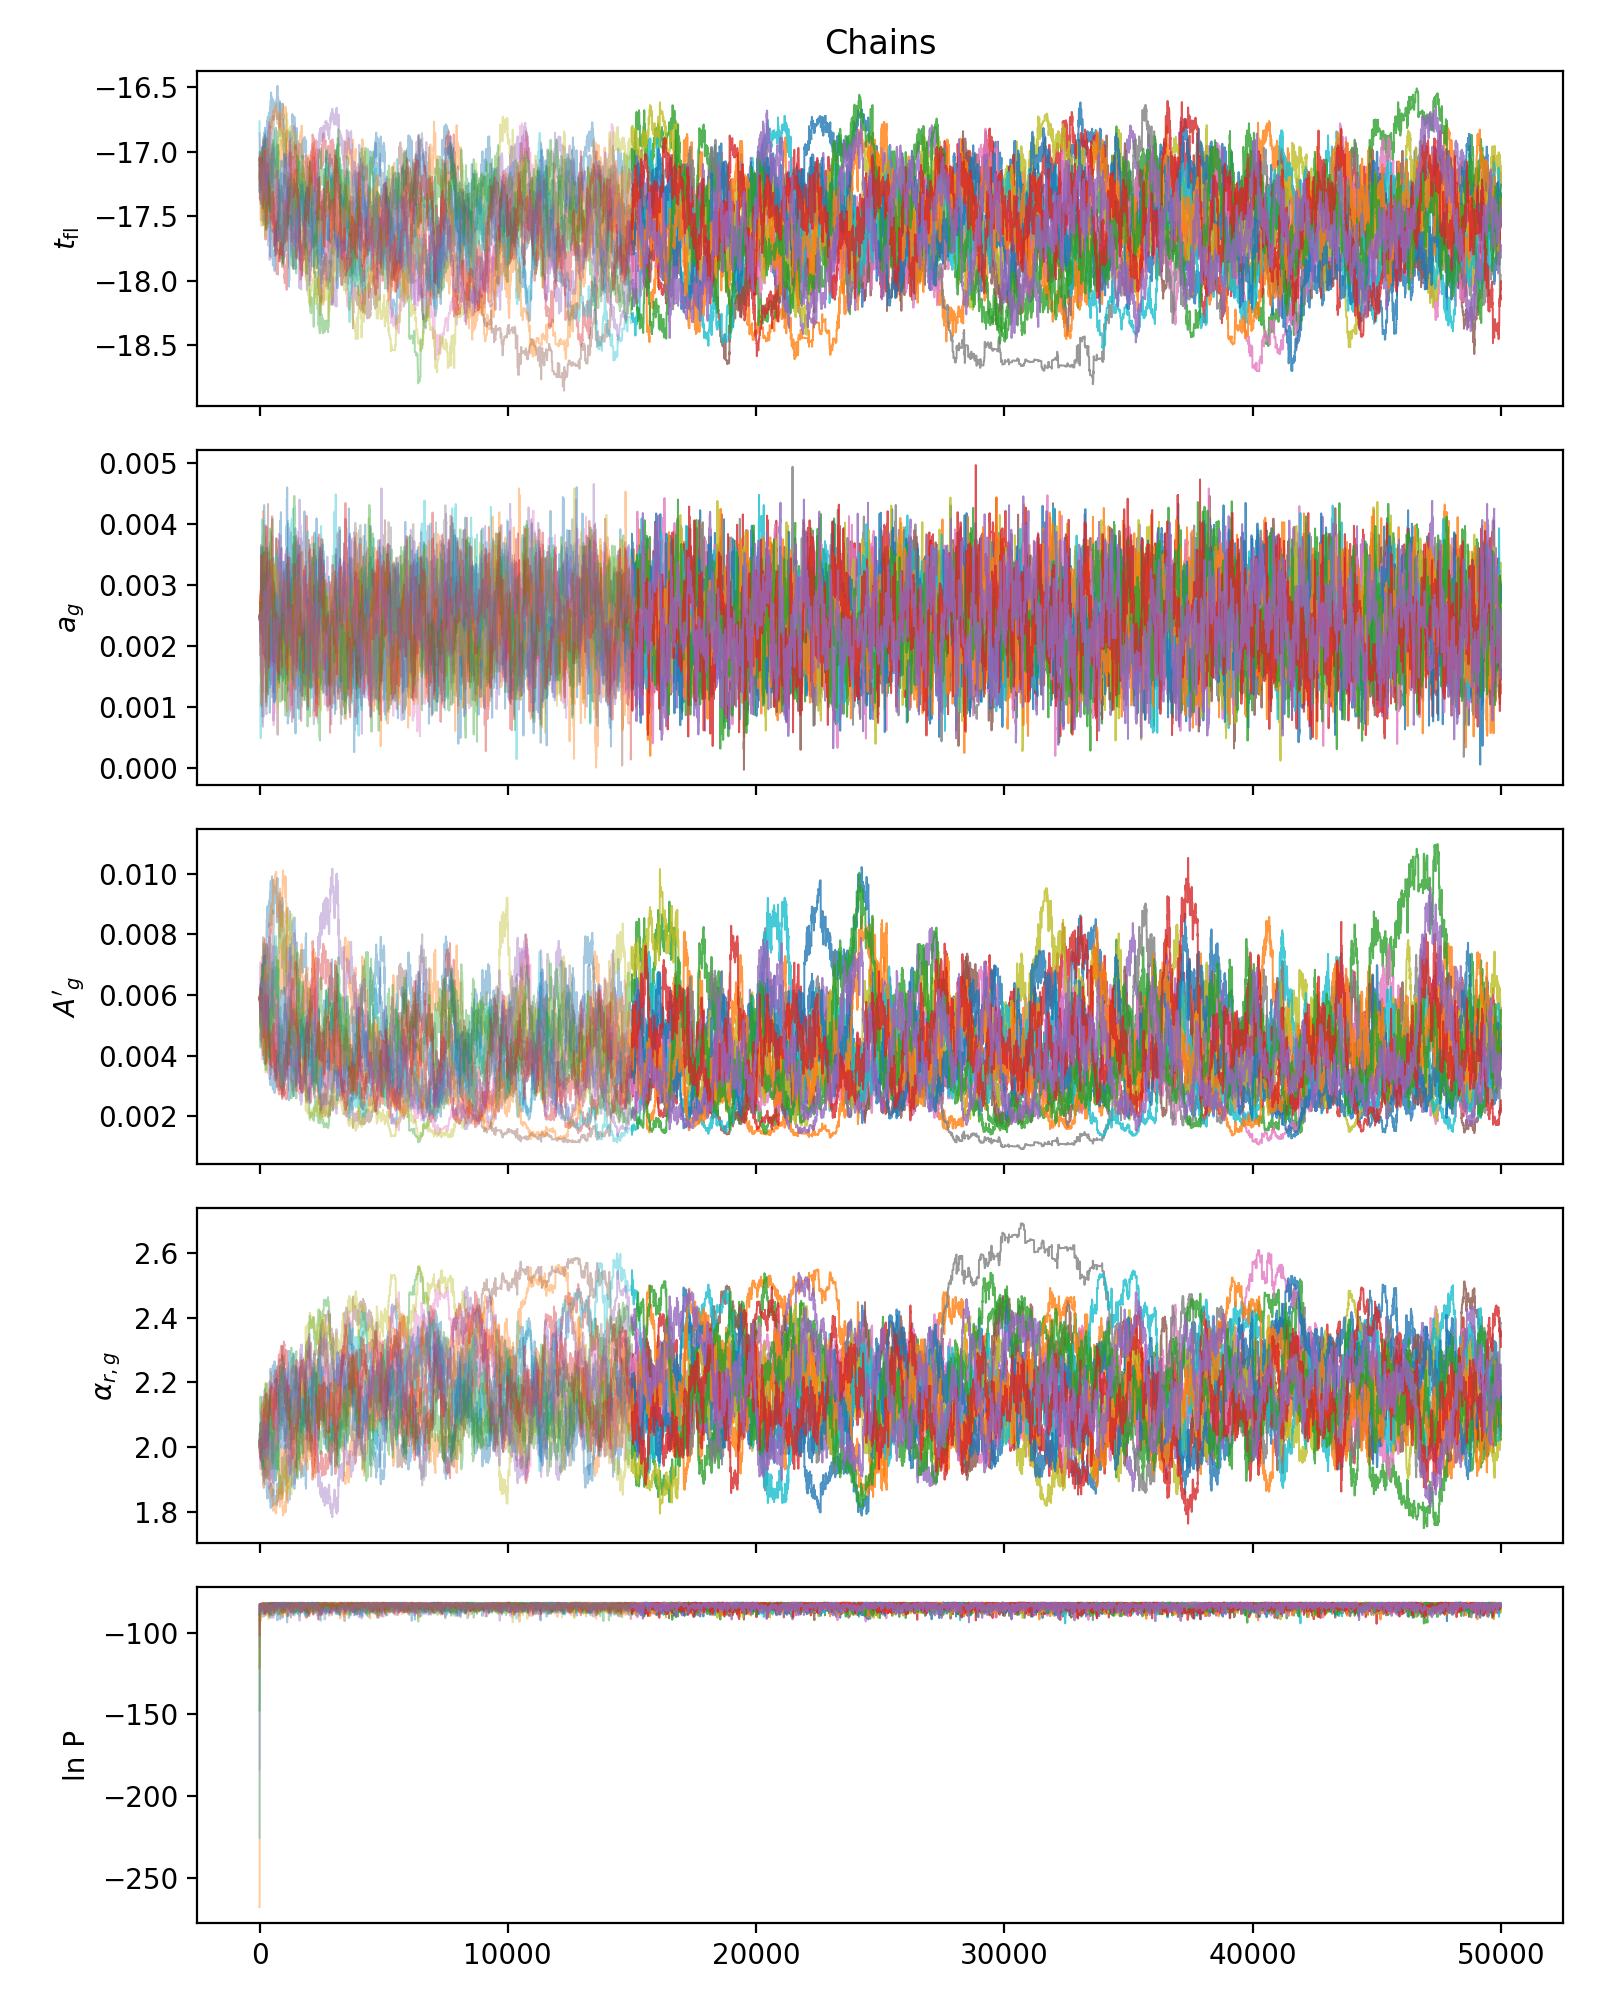

In [128]:
plotChains(sampler, 15000, paramsNames, nplot=15)
plt.tight_layout()

<IPython.core.display.Javascript object>


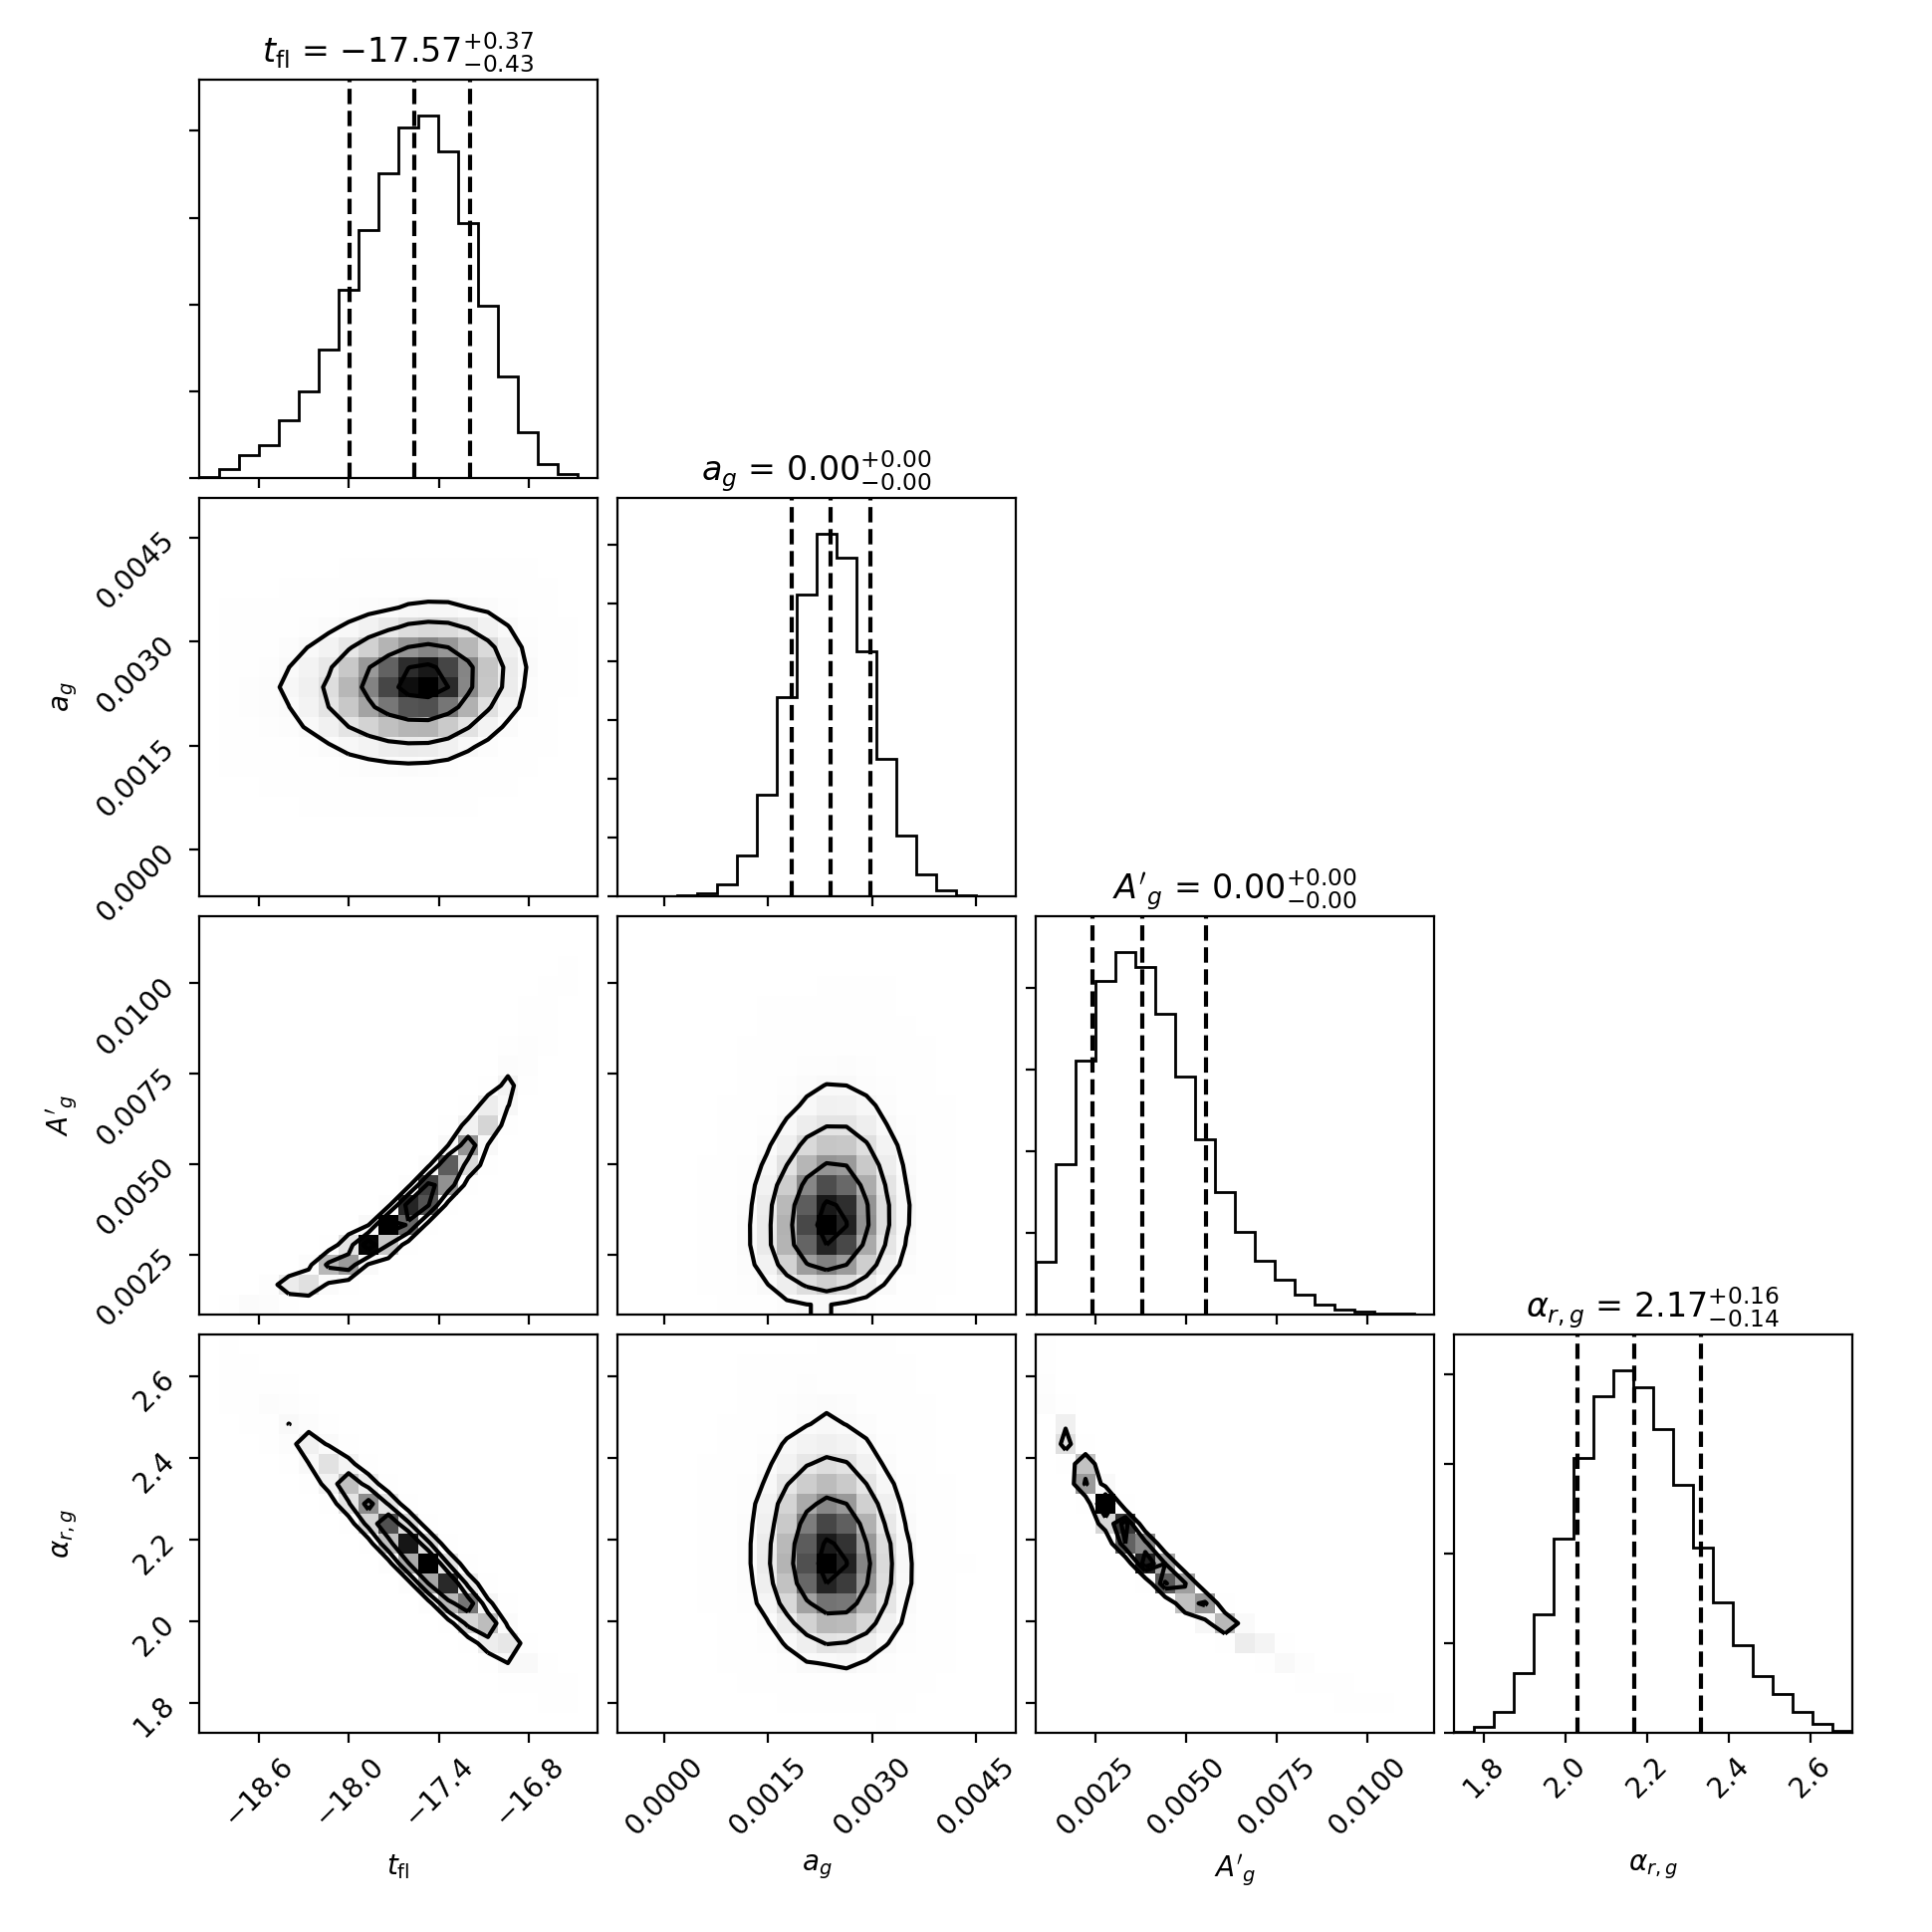

In [129]:
makeCorner(sampler, 25000, paramsNames)

## Fit multiple filters for $t_\mathrm{fl}$ and $\alpha_r$

In [18]:
def multifilter_lnlike_simple(theta, f, t, f_err, filt_arr):
    
    if len(theta) % 3 != 1:
        raise RuntimeError('The correct number of parameters were not included')
    
    ln_l = 0
    for filt_num, filt in enumerate(np.unique(filt_arr)):
        theta_filt = np.append(theta[0], theta[1+3*filt_num:4+3*filt_num])
        filt_obs = np.where(filt_arr == filt)
        f_filt = f[filt_obs]
        t_filt = t[filt_obs]
        f_err_filt = f_err[filt_obs]
        ln_l += lnlike_simple(theta_filt, f_filt, t_filt, f_err_filt)
    
    return ln_l

def multifilter_nll_simple(theta, f, t, f_err, filt_arr):
    return -1*multifilter_lnlike_simple(theta, f, t, f_err, filt_arr)

def multifilter_lnprior_simple(theta, filt_arr):
    
    if len(theta) % 3 != 1:
        raise RuntimeError('The correct number of parameters were not included')
    
    ln_p = 0
    for filt_num, filt in enumerate(np.unique(filt_arr)):
        theta_filt = np.append(theta[0], theta[1+3*filt_num:4+3*filt_num])
        ln_p += lnprior_simple(theta_filt)
    return ln_p

def multifilter_lnposterior_simple(theta, f, t, f_err, filt_arr):
    lnp = multifilter_lnprior_simple(theta, filt_arr)
    lnl = multifilter_lnlike_simple(theta, f, t, f_err, filt_arr)
    if not np.isfinite(lnl):
        return -np.inf
    if not np.isfinite(lnp):
        return -np.inf
    return lnl + lnp

In [19]:
time_rf = (lc_df['jdobs'].iloc[obs].values - t0)/(1+z)
flux = lc_df['Fratio'].iloc[obs].values
g_max = np.max(lc_df['Fratio'].iloc[g_obs].values)
r_max = np.max(lc_df['Fratio'].iloc[g_obs].values)
flux[g_obs] = flux[g_obs]/g_max
flux[r_obs] = flux[r_obs]/r_max
flux_unc = lc_df['Fratio_unc'].iloc[obs].values
flux_unc[g_obs] = flux_unc[g_obs]/g_max
flux_unc[r_obs] = flux_unc[r_obs]/r_max
filt_arr = lc_df['filter'].iloc[obs].values

t_fl = 18

guess_0 = [-t_fl, 
           0, 6e-3, 2,
           0, 6e-3, 2
          ]

half_max_g = np.where((flux[g_obs] < 0.5) & (time_rf[g_obs] < 0))
early_obs = np.where(time_rf <= time_rf[g_obs][np.max(half_max_g[0])])

f_data = flux[early_obs]
t_data = time_rf[early_obs]
f_unc_data = flux_unc[early_obs]
filt_data = filt_arr[early_obs]

print(multifilter_nll_simple(guess_0, flux, time_rf, flux_unc, filt_arr))

29219905367.129845


In [20]:
# initialize near maximum-likelihood result
ml_res = minimize(multifilter_nll_simple, guess_0, method='Powell', # Powell method does not need derivatives
                  args=(f_data, t_data, f_unc_data, filt_data))
ml_guess = ml_res.x
print(ml_guess)
print(multifilter_nll_simple(ml_guess, f_data, t_data, f_unc_data, filt_data))

[-1.94005788e+01  1.03492852e-03  1.99772492e-03  2.37204675e+00
 -7.42745405e-04  2.00660182e-03  2.38106082e+00]
85.85079120530972


In [21]:
###################################
###  sample without sig_0 term  ###
###################################


nwalkers = 100
ndim = len(ml_guess)
nfac = [1e-3]*ndim

#initial position of walkers
pos = [ml_guess + ml_guess * nfac * np.random.randn(ndim) for i in range(nwalkers)]

filename = 'tmp.h5'
backend = emcee.backends.HDFBackend(filename)
backend.reset(nwalkers, ndim)        


with Pool(4) as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, multifilter_lnposterior_simple, 
                                    args=(f_data, t_data, f_unc_data, filt_data),
                                    pool=pool, backend=backend)
    max_samples = 3000
    index = 0
    autocorr = np.empty(max_samples)
    old_tau = np.inf
    check_tau = 250
    for sample in sampler.sample(pos, iterations=max_samples, thin_by=1, progress=True):
        if sampler.iteration % check_tau:
            continue
        
        tstart = time.time()
        tau = sampler.get_autocorr_time(tol=0)
        tend = time.time()
        autocorr[index] = np.mean(tau)
        index += 1
        steps_so_far = index*check_tau
        print('''After {:d} steps, 
autocorrelation takes {:.3f} s ({} total FFTs)                
acceptance fraction = {:.4f}, and
tau = {}'''.format(steps_so_far, 
                   tend-tstart, nwalkers*ndim,
                   np.mean(sampler.acceptance_fraction), 
                   tau))

        # Check convergence
        converged = np.all(tau * 100 < sampler.iteration)
        converged &= np.all(np.abs(old_tau - tau) / tau < 0.01)
        if converged:
            break
        old_tau = tau

  1%|          | 33/3000 [00:00<00:51, 57.28it/s]

After 25 steps, 
autocorrelation takes 0.044 s (700 total FFTs)                
acceptance fraction = 0.5416, and
tau = [2.59972724 2.53394534 2.6263247  2.36221383 2.41199232 2.54581295
 2.25774866]


  2%|▏         | 60/3000 [00:00<00:48, 60.70it/s]

After 50 steps, 
autocorrelation takes 0.029 s (700 total FFTs)                
acceptance fraction = 0.5286, and
tau = [4.81125468 5.38449574 5.17942853 5.24044316 5.1079392  5.17047574
 4.89999515]


  3%|▎         | 88/3000 [00:01<00:46, 62.15it/s]

After 75 steps, 
autocorrelation takes 0.028 s (700 total FFTs)                
acceptance fraction = 0.5036, and
tau = [7.99994229 7.91278057 8.77068053 8.41678505 7.73914446 8.00419996
 7.83761707]


  4%|▎         | 109/3000 [00:01<00:47, 61.43it/s]

After 100 steps, 
autocorrelation takes 0.030 s (700 total FFTs)                
acceptance fraction = 0.4811, and
tau = [10.59208717 10.27042035 11.6427098  11.63251098 10.28835805 10.66948196
 10.62587358]


  5%|▍         | 137/3000 [00:02<00:45, 62.66it/s]

After 125 steps, 
autocorrelation takes 0.028 s (700 total FFTs)                
acceptance fraction = 0.4641, and
tau = [13.79087171 13.02544323 14.95275162 15.35084341 12.81289129 13.36469092
 12.7542007 ]


  5%|▌         | 158/3000 [00:02<00:47, 60.01it/s]

After 150 steps, 
autocorrelation takes 0.035 s (700 total FFTs)                
acceptance fraction = 0.4515, and
tau = [16.29333487 15.50310938 18.76200997 18.42463215 15.52913536 15.0105202
 14.47167125]


  6%|▌         | 186/3000 [00:03<00:47, 59.08it/s]

After 175 steps, 
autocorrelation takes 0.035 s (700 total FFTs)                
acceptance fraction = 0.4463, and
tau = [19.33925509 17.5730672  22.31778232 22.00073982 17.47971676 17.24116871
 16.12805524]


  7%|▋         | 207/3000 [00:03<00:49, 56.84it/s]

After 200 steps, 
autocorrelation takes 0.034 s (700 total FFTs)                
acceptance fraction = 0.4395, and
tau = [22.87613594 19.15483093 25.64415096 25.87734221 18.47348039 19.61104379
 18.39629222]


  8%|▊         | 235/3000 [00:03<00:47, 58.27it/s]

After 225 steps, 
autocorrelation takes 0.036 s (700 total FFTs)                
acceptance fraction = 0.4317, and
tau = [25.88484713 20.96717517 28.90737371 28.68329451 20.43214614 22.1841062
 20.00140016]


  9%|▉         | 263/3000 [00:04<00:46, 59.23it/s]

After 250 steps, 
autocorrelation takes 0.034 s (700 total FFTs)                
acceptance fraction = 0.4248, and
tau = [29.06800259 21.88013148 32.31392459 32.09596665 22.59743441 24.29559971
 21.9539439 ]


  9%|▉         | 284/3000 [00:04<00:46, 58.59it/s]

After 275 steps, 
autocorrelation takes 0.038 s (700 total FFTs)                
acceptance fraction = 0.4180, and
tau = [32.074574   23.27098251 35.64259387 35.50558756 25.27011681 26.27576906
 23.53197507]


 10%|█         | 312/3000 [00:05<00:45, 58.61it/s]

After 300 steps, 
autocorrelation takes 0.041 s (700 total FFTs)                
acceptance fraction = 0.4119, and
tau = [35.26027218 25.4762448  38.83365728 38.77468977 28.32974989 28.60297315
 25.78929113]


 11%|█         | 333/3000 [00:05<00:46, 57.54it/s]

After 325 steps, 
autocorrelation takes 0.041 s (700 total FFTs)                
acceptance fraction = 0.4066, and
tau = [38.85213286 27.03758275 42.35077168 42.37884691 30.9892858  31.52710484
 28.17759129]


 12%|█▏        | 359/3000 [00:06<00:46, 57.22it/s]

After 350 steps, 
autocorrelation takes 0.036 s (700 total FFTs)                
acceptance fraction = 0.4020, and
tau = [42.3854564  28.53470213 45.6739469  45.47693902 33.87007649 35.06766134
 30.78091282]


 13%|█▎        | 387/3000 [00:06<00:45, 56.82it/s]

After 375 steps, 
autocorrelation takes 0.041 s (700 total FFTs)                
acceptance fraction = 0.3980, and
tau = [46.08871511 30.34380907 49.04731333 48.69663927 36.18793463 38.69468391
 34.31768296]


 14%|█▎        | 412/3000 [00:06<00:45, 56.77it/s]

After 400 steps, 
autocorrelation takes 0.039 s (700 total FFTs)                
acceptance fraction = 0.3947, and
tau = [49.60300275 31.35906153 52.29696304 52.3499961  37.98821979 42.43781406
 38.12538991]


 14%|█▍        | 433/3000 [00:07<00:43, 58.96it/s]

After 425 steps, 
autocorrelation takes 0.038 s (700 total FFTs)                
acceptance fraction = 0.3925, and
tau = [53.73677126 32.33864915 56.15046012 56.09812891 39.57041964 46.0941313
 42.09675209]


 15%|█▌        | 461/3000 [00:07<00:42, 60.08it/s]

After 450 steps, 
autocorrelation takes 0.037 s (700 total FFTs)                
acceptance fraction = 0.3894, and
tau = [57.33552387 32.79621781 59.34286848 59.1646069  41.21064095 50.08016707
 45.90750677]


 16%|█▌        | 482/3000 [00:08<00:44, 57.01it/s]

After 475 steps, 
autocorrelation takes 0.043 s (700 total FFTs)                
acceptance fraction = 0.3878, and
tau = [60.63120531 33.67431935 62.51656139 62.80098925 43.27803155 54.15549098
 49.93663084]


 17%|█▋        | 510/3000 [00:08<00:42, 58.85it/s]

After 500 steps, 
autocorrelation takes 0.041 s (700 total FFTs)                
acceptance fraction = 0.3853, and
tau = [63.92709389 35.31038374 66.24672067 65.99580933 45.29067284 57.93795889
 53.84932374]


 18%|█▊        | 538/3000 [00:09<00:43, 57.08it/s]

After 525 steps, 
autocorrelation takes 0.054 s (700 total FFTs)                
acceptance fraction = 0.3832, and
tau = [67.22146951 36.55755892 69.51021729 69.18948399 47.29426554 61.33436112
 57.44401001]


 19%|█▊        | 559/3000 [00:09<00:42, 57.07it/s]

After 550 steps, 
autocorrelation takes 0.055 s (700 total FFTs)                
acceptance fraction = 0.3806, and
tau = [70.36468851 37.88594118 72.45521273 72.25639728 48.87539128 64.4284246
 60.8557091 ]


 20%|█▉        | 587/3000 [00:09<00:41, 57.76it/s]

After 575 steps, 
autocorrelation takes 0.053 s (700 total FFTs)                
acceptance fraction = 0.3787, and
tau = [73.28063673 39.09755865 75.36589185 75.40029021 50.54365981 67.71323895
 63.74551362]


 20%|██        | 608/3000 [00:10<00:41, 57.62it/s]

After 600 steps, 
autocorrelation takes 0.052 s (700 total FFTs)                
acceptance fraction = 0.3765, and
tau = [76.37729121 40.51692711 78.69143077 78.92582402 52.37955754 70.63343088
 66.71287973]


 21%|██        | 636/3000 [00:10<00:40, 58.94it/s]

After 625 steps, 
autocorrelation takes 0.051 s (700 total FFTs)                
acceptance fraction = 0.3740, and
tau = [79.19547734 42.32527352 81.91814871 81.84335255 53.79467089 73.42742139
 69.82165152]


 22%|██▏       | 664/3000 [00:11<00:39, 59.08it/s]

After 650 steps, 
autocorrelation takes 0.055 s (700 total FFTs)                
acceptance fraction = 0.3718, and
tau = [82.57423766 43.69042936 84.88119339 85.0805989  55.40094196 76.47573329
 72.66615028]


 23%|██▎       | 685/3000 [00:11<00:39, 58.22it/s]

After 675 steps, 
autocorrelation takes 0.054 s (700 total FFTs)                
acceptance fraction = 0.3705, and
tau = [85.37130104 44.49718789 87.84643766 88.39572038 57.57017652 79.74959855
 75.47044674]


 24%|██▍       | 713/3000 [00:12<00:39, 58.30it/s]

After 700 steps, 
autocorrelation takes 0.059 s (700 total FFTs)                
acceptance fraction = 0.3693, and
tau = [88.54817342 45.28472647 91.23477822 91.58732295 58.47288769 82.56124258
 78.76424756]


 24%|██▍       | 734/3000 [00:12<00:39, 57.29it/s]

After 725 steps, 
autocorrelation takes 0.053 s (700 total FFTs)                
acceptance fraction = 0.3678, and
tau = [91.75464466 45.96981442 94.70228418 94.84204066 59.17022347 85.62485783
 81.38759925]


 25%|██▌       | 762/3000 [00:12<00:38, 58.26it/s]

After 750 steps, 
autocorrelation takes 0.056 s (700 total FFTs)                
acceptance fraction = 0.3660, and
tau = [95.396655   46.49061992 97.8278226  98.14810075 59.9769405  89.36791786
 84.67025263]


 26%|██▌       | 783/3000 [00:13<00:39, 56.45it/s]

After 775 steps, 
autocorrelation takes 0.060 s (700 total FFTs)                
acceptance fraction = 0.3640, and
tau = [ 98.32124979  46.96566327 101.16270525 101.65568309  60.58685947
  92.52603012  88.21140928]


 27%|██▋       | 811/3000 [00:13<00:39, 55.54it/s]

After 800 steps, 
autocorrelation takes 0.062 s (700 total FFTs)                
acceptance fraction = 0.3625, and
tau = [102.19097251  47.56073406 104.39499837 104.93918718  61.35591392
  96.1199955   91.3925673 ]


 28%|██▊       | 837/3000 [00:14<00:41, 51.67it/s]

After 825 steps, 
autocorrelation takes 0.070 s (700 total FFTs)                
acceptance fraction = 0.3609, and
tau = [105.45817486  48.15045192 107.76541742 108.79080667  62.36692581
  99.27994069  94.72782525]


 29%|██▊       | 858/3000 [00:14<00:40, 52.76it/s]

After 850 steps, 
autocorrelation takes 0.063 s (700 total FFTs)                
acceptance fraction = 0.3592, and
tau = [109.07832598  49.36336889 111.45013889 112.07774476  63.31680532
 102.93937995  98.38138759]


 30%|██▉       | 885/3000 [00:15<00:39, 53.57it/s]

After 875 steps, 
autocorrelation takes 0.063 s (700 total FFTs)                
acceptance fraction = 0.3573, and
tau = [112.56032581  50.54369548 115.10439687 115.31231483  64.5521269
 106.58954571 102.34787468]


 30%|███       | 912/3000 [00:15<00:39, 52.74it/s]

After 900 steps, 
autocorrelation takes 0.066 s (700 total FFTs)                
acceptance fraction = 0.3555, and
tau = [116.31188339  51.27640742 118.54121365 119.19527038  65.68855765
 110.38171729 105.95480705]


 31%|███       | 933/3000 [00:16<00:39, 52.83it/s]

After 925 steps, 
autocorrelation takes 0.065 s (700 total FFTs)                
acceptance fraction = 0.3540, and
tau = [119.84473487  52.28551548 121.6818215  122.42514132  66.72965561
 113.94189691 109.29014402]


 32%|███▏      | 959/3000 [00:16<00:38, 53.25it/s]

After 950 steps, 
autocorrelation takes 0.064 s (700 total FFTs)                
acceptance fraction = 0.3532, and
tau = [123.3793077   53.05934639 125.35836988 125.73459768  67.75550002
 117.1557406  113.00501833]


 33%|███▎      | 985/3000 [00:17<00:38, 52.03it/s]

After 975 steps, 
autocorrelation takes 0.064 s (700 total FFTs)                
acceptance fraction = 0.3520, and
tau = [127.02764389  53.34402873 128.66661754 129.70476815  68.93842707
 121.18730791 116.56855612]


 34%|███▎      | 1012/3000 [00:17<00:36, 53.97it/s]

After 1000 steps, 
autocorrelation takes 0.066 s (700 total FFTs)                
acceptance fraction = 0.3513, and
tau = [130.30442472  53.8861694  132.26467487 132.80619422  70.33453745
 124.55789223 120.41035628]


 34%|███▍      | 1033/3000 [00:17<00:37, 51.87it/s]

After 1025 steps, 
autocorrelation takes 0.085 s (700 total FFTs)                
acceptance fraction = 0.3502, and
tau = [133.87904466  54.11591597 135.91190714 136.47415121  71.73016602
 128.48113292 124.33828109]


 35%|███▌      | 1061/3000 [00:18<00:36, 53.34it/s]

After 1050 steps, 
autocorrelation takes 0.084 s (700 total FFTs)                
acceptance fraction = 0.3497, and
tau = [137.59734322  54.42341455 139.21172624 139.80594742  72.92108411
 132.21988632 127.86056019]


 36%|███▌      | 1082/3000 [00:18<00:38, 49.66it/s]

After 1075 steps, 
autocorrelation takes 0.085 s (700 total FFTs)                
acceptance fraction = 0.3489, and
tau = [140.95467485  54.73903702 142.94425511 143.60465128  73.98156064
 135.79888974 131.68606923]


 37%|███▋      | 1109/3000 [00:19<00:36, 51.84it/s]

After 1100 steps, 
autocorrelation takes 0.085 s (700 total FFTs)                
acceptance fraction = 0.3480, and
tau = [144.64622555  55.96681913 146.07290318 146.69574932  75.1324469
 139.3340113  135.53032039]


 38%|███▊      | 1137/3000 [00:19<00:34, 53.30it/s]

After 1125 steps, 
autocorrelation takes 0.094 s (700 total FFTs)                
acceptance fraction = 0.3472, and
tau = [148.09213111  57.57821879 149.77418424 150.43457715  76.31216835
 143.33895425 138.75064519]


 39%|███▊      | 1158/3000 [00:20<00:35, 52.58it/s]

After 1150 steps, 
autocorrelation takes 0.085 s (700 total FFTs)                
acceptance fraction = 0.3463, and
tau = [151.89354802  58.65506805 153.30857526 154.05556869  76.93267531
 146.77940247 142.48650989]


 40%|███▉      | 1186/3000 [00:20<00:33, 54.11it/s]

After 1175 steps, 
autocorrelation takes 0.088 s (700 total FFTs)                
acceptance fraction = 0.3453, and
tau = [155.33034868  59.96500782 156.64501683 157.38553355  77.59428344
 150.29668319 145.90379023]


 40%|████      | 1207/3000 [00:21<00:36, 49.35it/s]

After 1200 steps, 
autocorrelation takes 0.091 s (700 total FFTs)                
acceptance fraction = 0.3447, and
tau = [158.89334248  61.25739704 159.7652743  160.45652374  78.39142907
 153.59855153 149.38090938]


 41%|████      | 1235/3000 [00:21<00:33, 53.17it/s]

After 1225 steps, 
autocorrelation takes 0.087 s (700 total FFTs)                
acceptance fraction = 0.3440, and
tau = [162.13772689  62.65290077 163.29764446 163.9890303   79.49251408
 157.52129035 152.86778334]


 42%|████▏     | 1263/3000 [00:22<00:33, 51.96it/s]

After 1250 steps, 
autocorrelation takes 0.091 s (700 total FFTs)                
acceptance fraction = 0.3428, and
tau = [165.20152906  64.1933597  166.21325734 166.89844822  80.88605439
 160.67681093 156.50446458]


 43%|████▎     | 1281/3000 [00:22<00:38, 45.04it/s]

After 1275 steps, 
autocorrelation takes 0.094 s (700 total FFTs)                
acceptance fraction = 0.3417, and
tau = [168.59145984  65.23506538 169.81360669 170.63107701  82.04248502
 164.34373619 159.89762676]


 44%|████▎     | 1308/3000 [00:23<00:34, 48.90it/s]

After 1300 steps, 
autocorrelation takes 0.091 s (700 total FFTs)                
acceptance fraction = 0.3406, and
tau = [172.1380792   66.08729701 172.8771256  173.7558537   83.59257411
 167.5444733  163.23075146]


 44%|████▍     | 1335/3000 [00:23<00:33, 50.35it/s]

After 1325 steps, 
autocorrelation takes 0.090 s (700 total FFTs)                
acceptance fraction = 0.3397, and
tau = [175.90129135  66.8497217  176.45340856 176.88760005  85.16076237
 171.14373784 167.00611137]


 45%|████▌     | 1362/3000 [00:24<00:32, 49.97it/s]

After 1350 steps, 
autocorrelation takes 0.095 s (700 total FFTs)                
acceptance fraction = 0.3389, and
tau = [179.44017852  67.79855802 179.81117488 180.47092865  86.42966438
 174.93510314 170.56349631]


 46%|████▌     | 1383/3000 [00:24<00:32, 49.06it/s]

After 1375 steps, 
autocorrelation takes 0.097 s (700 total FFTs)                
acceptance fraction = 0.3378, and
tau = [183.01111687  68.17650146 183.23472371 184.19754428  87.48707369
 178.71728478 174.63185799]


 47%|████▋     | 1409/3000 [00:25<00:32, 49.58it/s]

After 1400 steps, 
autocorrelation takes 0.091 s (700 total FFTs)                
acceptance fraction = 0.3371, and
tau = [186.52557557  68.86995154 186.55174476 187.71548573  88.35787816
 182.19035535 178.39403094]


 48%|████▊     | 1436/3000 [00:25<00:30, 50.64it/s]

After 1425 steps, 
autocorrelation takes 0.093 s (700 total FFTs)                
acceptance fraction = 0.3360, and
tau = [189.70875655  70.13266315 189.75596181 191.13992382  89.21513765
 185.64756873 181.72468761]


 49%|████▊     | 1457/3000 [00:26<00:32, 48.09it/s]

After 1450 steps, 
autocorrelation takes 0.092 s (700 total FFTs)                
acceptance fraction = 0.3349, and
tau = [193.55163751  70.92200434 193.34212401 194.50753267  90.06604529
 189.33872208 185.23337441]


 49%|████▉     | 1484/3000 [00:26<00:30, 49.86it/s]

After 1475 steps, 
autocorrelation takes 0.094 s (700 total FFTs)                
acceptance fraction = 0.3339, and
tau = [196.29661628  71.54887962 196.17862926 197.68984774  90.74780717
 192.58651728 188.78779143]


 50%|█████     | 1511/3000 [00:27<00:29, 49.66it/s]

After 1500 steps, 
autocorrelation takes 0.095 s (700 total FFTs)                
acceptance fraction = 0.3329, and
tau = [199.50031883  72.39538508 199.42021929 200.70659799  91.74746063
 195.84870759 192.34754236]


 51%|█████▏    | 1538/3000 [00:27<00:29, 49.92it/s]

After 1525 steps, 
autocorrelation takes 0.091 s (700 total FFTs)                
acceptance fraction = 0.3320, and
tau = [202.98175348  73.03499688 202.90978243 203.91401849  93.04473665
 199.40235558 195.5104812 ]


 52%|█████▏    | 1558/3000 [00:28<00:30, 47.97it/s]

After 1550 steps, 
autocorrelation takes 0.096 s (700 total FFTs)                
acceptance fraction = 0.3310, and
tau = [206.01271864  74.18008205 205.94678837 207.10231645  94.17383961
 202.48470914 198.82419857]


 53%|█████▎    | 1585/3000 [00:28<00:29, 47.50it/s]

After 1575 steps, 
autocorrelation takes 0.102 s (700 total FFTs)                
acceptance fraction = 0.3299, and
tau = [209.16761636  75.00088719 209.05943021 210.37936401  95.58920633
 205.84761561 202.15943736]


 54%|█████▎    | 1611/3000 [00:29<00:29, 47.65it/s]

After 1600 steps, 
autocorrelation takes 0.101 s (700 total FFTs)                
acceptance fraction = 0.3290, and
tau = [212.1765615   75.77810147 211.97293889 213.9343049   96.88445695
 208.88070921 205.58309761]


 55%|█████▍    | 1637/3000 [00:29<00:28, 47.91it/s]

After 1625 steps, 
autocorrelation takes 0.102 s (700 total FFTs)                
acceptance fraction = 0.3281, and
tau = [215.55079528  76.76386798 215.34608439 216.96911434  97.84861976
 211.98173544 208.71608845]


 55%|█████▌    | 1656/3000 [00:30<00:31, 43.29it/s]

After 1650 steps, 
autocorrelation takes 0.102 s (700 total FFTs)                
acceptance fraction = 0.3272, and
tau = [218.33948082  77.64859304 218.28640028 220.13736823  98.63720836
 215.5894516  211.82702913]


 56%|█████▌    | 1683/3000 [00:30<00:27, 47.83it/s]

After 1675 steps, 
autocorrelation takes 0.099 s (700 total FFTs)                
acceptance fraction = 0.3264, and
tau = [221.78811346  78.57398351 221.76346433 223.28208641  99.50820427
 218.40659304 214.7963691 ]


 57%|█████▋    | 1711/3000 [00:31<00:24, 51.86it/s]

After 1700 steps, 
autocorrelation takes 0.097 s (700 total FFTs)                
acceptance fraction = 0.3253, and
tau = [224.56900772  79.37348756 224.80048133 226.5419243  100.49512651
 221.88427774 218.56433543]


 58%|█████▊    | 1732/3000 [00:31<00:26, 48.58it/s]

After 1725 steps, 
autocorrelation takes 0.099 s (700 total FFTs)                
acceptance fraction = 0.3244, and
tau = [228.11084489  80.14076045 227.92942799 229.79946859 101.5386057
 225.351974   221.81160837]


 59%|█████▊    | 1760/3000 [00:32<00:24, 51.15it/s]

After 1750 steps, 
autocorrelation takes 0.099 s (700 total FFTs)                
acceptance fraction = 0.3231, and
tau = [231.13991522  81.033807   231.01369854 232.98627185 102.31548075
 228.27675177 224.90047762]


 60%|█████▉    | 1788/3000 [00:32<00:22, 52.75it/s]

After 1775 steps, 
autocorrelation takes 0.099 s (700 total FFTs)                
acceptance fraction = 0.3222, and
tau = [234.19339113  81.88543486 234.36812446 235.92360803 103.1522934
 231.62165444 228.37221452]


 60%|██████    | 1809/3000 [00:32<00:23, 50.94it/s]

After 1800 steps, 
autocorrelation takes 0.103 s (700 total FFTs)                
acceptance fraction = 0.3213, and
tau = [237.73083109  82.68908114 237.57671028 239.2250675  104.06474183
 235.29674271 231.65091203]


 61%|██████    | 1836/3000 [00:33<00:23, 49.13it/s]

After 1825 steps, 
autocorrelation takes 0.106 s (700 total FFTs)                
acceptance fraction = 0.3205, and
tau = [240.88372511  83.43018797 240.82981866 242.55916619 105.14388031
 238.4539621  235.38463668]


 62%|██████▏   | 1857/3000 [00:33<00:24, 46.55it/s]

After 1850 steps, 
autocorrelation takes 0.105 s (700 total FFTs)                
acceptance fraction = 0.3196, and
tau = [244.15164651  84.27706722 243.9044307  245.7096184  105.94829411
 241.80679229 238.18936519]


 63%|██████▎   | 1884/3000 [00:34<00:22, 49.80it/s]

After 1875 steps, 
autocorrelation takes 0.101 s (700 total FFTs)                
acceptance fraction = 0.3187, and
tau = [247.48828614  85.26733552 246.77788137 249.10781399 106.52837169
 245.14444607 241.55090113]


 64%|██████▎   | 1912/3000 [00:34<00:20, 52.03it/s]

After 1900 steps, 
autocorrelation takes 0.099 s (700 total FFTs)                
acceptance fraction = 0.3176, and
tau = [250.81494077  86.48897721 250.13203944 252.02290728 106.82361174
 248.20426004 244.52094804]


 64%|██████▍   | 1933/3000 [00:35<00:21, 50.25it/s]

After 1925 steps, 
autocorrelation takes 0.101 s (700 total FFTs)                
acceptance fraction = 0.3167, and
tau = [253.84223476  87.82915239 253.1399438  255.07137714 107.34956227
 251.53778946 247.84132775]


 65%|██████▌   | 1960/3000 [00:35<00:21, 49.02it/s]

After 1950 steps, 
autocorrelation takes 0.104 s (700 total FFTs)                
acceptance fraction = 0.3159, and
tau = [257.37322101  89.06644863 256.41807031 258.4427176  107.82837823
 254.65196354 251.36106675]


 66%|██████▌   | 1987/3000 [00:36<00:21, 47.23it/s]

After 1975 steps, 
autocorrelation takes 0.112 s (700 total FFTs)                
acceptance fraction = 0.3149, and
tau = [260.97694912  89.96864397 259.79156347 261.83853508 108.10350373
 257.96518278 254.70876442]


 67%|██████▋   | 2008/3000 [00:36<00:20, 48.34it/s]

After 2000 steps, 
autocorrelation takes 0.104 s (700 total FFTs)                
acceptance fraction = 0.3140, and
tau = [264.09613962  90.84708502 263.01953441 264.97844081 108.94611689
 261.26387671 258.06870156]


 68%|██████▊   | 2034/3000 [00:37<00:20, 47.10it/s]

After 2025 steps, 
autocorrelation takes 0.108 s (700 total FFTs)                
acceptance fraction = 0.3131, and
tau = [267.92997848  91.85672574 266.37606508 267.8737903  109.95183435
 264.79542788 261.75643641]


 69%|██████▊   | 2060/3000 [00:38<00:22, 42.25it/s]

After 2050 steps, 
autocorrelation takes 0.163 s (700 total FFTs)                
acceptance fraction = 0.3124, and
tau = [271.38773913  92.97521309 269.3756089  271.56080555 111.31992083
 268.51087713 265.26454396]


 69%|██████▉   | 2080/3000 [00:38<00:24, 36.98it/s]

After 2075 steps, 
autocorrelation takes 0.153 s (700 total FFTs)                
acceptance fraction = 0.3117, and
tau = [274.7117757   93.5950474  272.88755946 274.8432307  112.35018591
 271.59932178 268.6190157 ]


 70%|███████   | 2111/3000 [00:39<00:21, 41.73it/s]

After 2100 steps, 
autocorrelation takes 0.148 s (700 total FFTs)                
acceptance fraction = 0.3108, and
tau = [278.2137636   94.19566823 275.82879832 278.08986803 113.27948357
 274.96168065 272.08844518]


 71%|███████   | 2131/3000 [00:39<00:22, 37.80it/s]

After 2125 steps, 
autocorrelation takes 0.148 s (700 total FFTs)                
acceptance fraction = 0.3097, and
tau = [281.68455338  94.9262867  279.40065952 281.59245546 114.44436493
 278.35695526 275.70036083]


 72%|███████▏  | 2157/3000 [00:40<00:19, 43.20it/s]

After 2150 steps, 
autocorrelation takes 0.148 s (700 total FFTs)                
acceptance fraction = 0.3088, and
tau = [284.96562379  95.78472155 282.34977978 284.85002658 115.33018673
 282.09211164 278.7141708 ]


 73%|███████▎  | 2182/3000 [00:40<00:18, 43.19it/s]

After 2175 steps, 
autocorrelation takes 0.145 s (700 total FFTs)                
acceptance fraction = 0.3079, and
tau = [288.39546475  96.75730501 285.98064049 288.23589446 116.07124692
 284.98119932 282.26259308]


 74%|███████▎  | 2207/3000 [00:41<00:18, 42.73it/s]

After 2200 steps, 
autocorrelation takes 0.151 s (700 total FFTs)                
acceptance fraction = 0.3070, and
tau = [291.84046269  97.69901957 289.05825857 291.507022   116.47332097
 288.34208289 285.76406401]


 74%|███████▍  | 2232/3000 [00:41<00:18, 41.55it/s]

After 2225 steps, 
autocorrelation takes 0.146 s (700 total FFTs)                
acceptance fraction = 0.3059, and
tau = [294.77128421  98.60052906 292.20006275 294.87929046 116.89093225
 291.82519779 288.89744252]


 75%|███████▌  | 2257/3000 [00:42<00:17, 42.35it/s]

After 2250 steps, 
autocorrelation takes 0.144 s (700 total FFTs)                
acceptance fraction = 0.3050, and
tau = [298.04337517  99.68141892 295.2282152  297.97788312 117.26747265
 294.69936543 292.34179088]


 76%|███████▌  | 2282/3000 [00:43<00:16, 42.34it/s]

After 2275 steps, 
autocorrelation takes 0.146 s (700 total FFTs)                
acceptance fraction = 0.3041, and
tau = [301.46362841 100.76609063 298.58310294 300.89608539 117.69734578
 297.9316348  295.22874967]


 77%|███████▋  | 2307/3000 [00:43<00:16, 41.90it/s]

After 2300 steps, 
autocorrelation takes 0.151 s (700 total FFTs)                
acceptance fraction = 0.3032, and
tau = [304.39565264 101.64325046 301.45703564 304.3447007  117.99962098
 301.24363909 298.7548355 ]


 78%|███████▊  | 2332/3000 [00:44<00:16, 41.39it/s]

After 2325 steps, 
autocorrelation takes 0.148 s (700 total FFTs)                
acceptance fraction = 0.3025, and
tau = [307.59605205 102.76538744 304.55841998 307.14858661 118.42123951
 304.68359904 301.93289105]


 79%|███████▊  | 2357/3000 [00:44<00:14, 43.27it/s]

After 2350 steps, 
autocorrelation takes 0.147 s (700 total FFTs)                
acceptance fraction = 0.3017, and
tau = [311.0779437  104.1690389  307.79031565 310.61298407 118.91699715
 308.08347787 305.57166554]


 79%|███████▉  | 2382/3000 [00:45<00:14, 43.00it/s]

After 2375 steps, 
autocorrelation takes 0.159 s (700 total FFTs)                
acceptance fraction = 0.3007, and
tau = [313.94952574 105.65302463 310.91830358 313.97889185 119.56834328
 311.27822141 308.39672619]


 80%|████████  | 2406/3000 [00:45<00:16, 36.90it/s]

After 2400 steps, 
autocorrelation takes 0.159 s (700 total FFTs)                
acceptance fraction = 0.2998, and
tau = [317.31913879 107.26311286 314.17735871 317.07610768 120.24080797
 314.35003143 311.5589219 ]


 81%|████████  | 2431/3000 [00:46<00:15, 35.66it/s]

After 2425 steps, 
autocorrelation takes 0.164 s (700 total FFTs)                
acceptance fraction = 0.2991, and
tau = [320.56669877 108.58605621 317.37669599 320.6426914  121.29395006
 317.39940299 314.73627447]


 82%|████████▏ | 2457/3000 [00:47<00:13, 40.12it/s]

After 2450 steps, 
autocorrelation takes 0.153 s (700 total FFTs)                
acceptance fraction = 0.2984, and
tau = [323.61330455 109.53441429 320.45304311 323.60233651 122.47504423
 320.30850645 318.32831137]


 83%|████████▎ | 2480/3000 [00:47<00:15, 33.97it/s]

After 2475 steps, 
autocorrelation takes 0.181 s (700 total FFTs)                
acceptance fraction = 0.2976, and
tau = [326.67036264 110.57180484 323.63190281 327.08071502 123.73153431
 323.34579508 321.00879171]


 84%|████████▎ | 2511/3000 [00:48<00:12, 39.89it/s]

After 2500 steps, 
autocorrelation takes 0.156 s (700 total FFTs)                
acceptance fraction = 0.2968, and
tau = [329.52241082 111.60655065 326.72510614 330.0066566  124.89132349
 326.69809308 323.92229958]


 84%|████████▍ | 2535/3000 [00:49<00:11, 40.27it/s]

After 2525 steps, 
autocorrelation takes 0.157 s (700 total FFTs)                
acceptance fraction = 0.2962, and
tau = [332.62429392 112.85241362 329.91392536 332.97821245 125.97159489
 329.46958606 327.16007845]


 85%|████████▌ | 2560/3000 [00:49<00:10, 41.19it/s]

After 2550 steps, 
autocorrelation takes 0.155 s (700 total FFTs)                
acceptance fraction = 0.2956, and
tau = [335.56457156 113.89183352 332.53440337 336.3212716  127.24675877
 332.11400805 329.77114685]


 86%|████████▌ | 2584/3000 [00:50<00:10, 39.25it/s]

After 2575 steps, 
autocorrelation takes 0.167 s (700 total FFTs)                
acceptance fraction = 0.2949, and
tau = [338.59396235 115.05599613 335.69060609 339.23009434 128.24353017
 335.26123834 332.96370856]


 87%|████████▋ | 2609/3000 [00:50<00:09, 40.54it/s]

After 2600 steps, 
autocorrelation takes 0.157 s (700 total FFTs)                
acceptance fraction = 0.2942, and
tau = [341.71860735 116.47202335 338.89581452 342.73117781 129.07571844
 337.90863527 335.56324375]


 88%|████████▊ | 2634/3000 [00:51<00:08, 40.87it/s]

After 2625 steps, 
autocorrelation takes 0.157 s (700 total FFTs)                
acceptance fraction = 0.2936, and
tau = [344.68971697 117.81481603 341.9879564  345.49390338 130.33727328
 341.03213843 338.53530053]


 89%|████████▊ | 2660/3000 [00:52<00:08, 40.45it/s]

After 2650 steps, 
autocorrelation takes 0.164 s (700 total FFTs)                
acceptance fraction = 0.2928, and
tau = [347.70557923 119.21519567 345.10775335 348.80239267 131.38833609
 344.1318239  341.32889377]


 90%|████████▉ | 2686/3000 [00:52<00:07, 41.60it/s]

After 2675 steps, 
autocorrelation takes 0.153 s (700 total FFTs)                
acceptance fraction = 0.2924, and
tau = [350.89471927 120.26046998 348.01449788 351.84013231 132.36993136
 346.47727326 343.90648379]


 90%|█████████ | 2706/3000 [00:53<00:08, 36.48it/s]

After 2700 steps, 
autocorrelation takes 0.162 s (700 total FFTs)                
acceptance fraction = 0.2918, and
tau = [353.39297691 121.11267946 350.81933466 354.79812744 133.64807008
 349.28448001 346.91160331]


 91%|█████████ | 2732/3000 [00:53<00:06, 41.74it/s]

After 2725 steps, 
autocorrelation takes 0.158 s (700 total FFTs)                
acceptance fraction = 0.2912, and
tau = [356.36803665 122.07425635 353.61544947 357.75310728 135.18529758
 352.53629104 349.31127248]


 92%|█████████▏| 2757/3000 [00:54<00:05, 40.97it/s]

After 2750 steps, 
autocorrelation takes 0.164 s (700 total FFTs)                
acceptance fraction = 0.2906, and
tau = [359.55929235 123.15682902 356.5614191  360.90081292 136.78600792
 354.91969167 352.46274437]


 93%|█████████▎| 2782/3000 [00:54<00:05, 41.50it/s]

After 2775 steps, 
autocorrelation takes 0.159 s (700 total FFTs)                
acceptance fraction = 0.2901, and
tau = [362.09665699 124.4328825  359.87211205 363.92390733 138.12526843
 357.7338525  355.06103945]


 94%|█████████▎| 2807/3000 [00:55<00:04, 40.69it/s]

After 2800 steps, 
autocorrelation takes 0.163 s (700 total FFTs)                
acceptance fraction = 0.2896, and
tau = [365.15190995 125.79793443 362.61064201 366.77085869 139.43864497
 360.63731568 357.79663537]


 94%|█████████▍| 2832/3000 [00:55<00:04, 41.34it/s]

After 2825 steps, 
autocorrelation takes 0.159 s (700 total FFTs)                
acceptance fraction = 0.2892, and
tau = [367.84720653 127.01960965 365.7226366  369.39741549 140.61007834
 363.70886159 360.66366183]


 95%|█████████▌| 2857/3000 [00:56<00:03, 41.05it/s]

After 2850 steps, 
autocorrelation takes 0.162 s (700 total FFTs)                
acceptance fraction = 0.2887, and
tau = [371.05665007 127.78214098 368.35723354 372.53887365 141.76318655
 366.38466152 363.78218157]


 96%|█████████▌| 2882/3000 [00:57<00:02, 40.91it/s]

After 2875 steps, 
autocorrelation takes 0.165 s (700 total FFTs)                
acceptance fraction = 0.2882, and
tau = [373.67010736 128.32517148 371.46975986 375.20475623 142.92256536
 369.65006541 366.48859293]


 97%|█████████▋| 2907/3000 [00:57<00:02, 39.03it/s]

After 2900 steps, 
autocorrelation takes 0.174 s (700 total FFTs)                
acceptance fraction = 0.2877, and
tau = [376.69552993 129.08420305 374.00908259 378.24242565 143.87285353
 372.2584699  369.46256412]


 98%|█████████▊| 2932/3000 [00:58<00:01, 39.95it/s]

After 2925 steps, 
autocorrelation takes 0.163 s (700 total FFTs)                
acceptance fraction = 0.2872, and
tau = [379.72210359 129.9878212  376.95243171 381.14157609 144.4737966
 375.29193995 372.30215318]


 99%|█████████▊| 2957/3000 [00:58<00:01, 40.68it/s]

After 2950 steps, 
autocorrelation takes 0.161 s (700 total FFTs)                
acceptance fraction = 0.2866, and
tau = [382.11308699 130.76887631 379.80813514 384.0138484  144.96175182
 378.21470574 375.02397706]


 99%|█████████▉| 2982/3000 [00:59<00:00, 41.02it/s]

After 2975 steps, 
autocorrelation takes 0.161 s (700 total FFTs)                
acceptance fraction = 0.2860, and
tau = [385.05148478 131.26830092 382.69120647 386.92052984 145.71603748
 380.85228139 377.62252065]


100%|██████████| 3000/3000 [01:00<00:00, 49.99it/s]

After 3000 steps, 
autocorrelation takes 0.164 s (700 total FFTs)                
acceptance fraction = 0.2856, and
tau = [387.91451811 132.19879345 385.48881614 389.76720652 146.30702042
 383.87798687 380.57798133]


After 100 steps, 
autocorrelation takes 0.035 s (700 total FFTs)                
acceptance fraction = 0.2732, and
tau = [5.84013413 1.91818081 5.82661309 5.82264879 1.9015862  5.77467252
 5.72451288]

In [27]:
reader = emcee.backends.HDFBackend(filename)
np.shape(reader.get_chain())

(100, 100, 7)

<IPython.core.display.Javascript object>


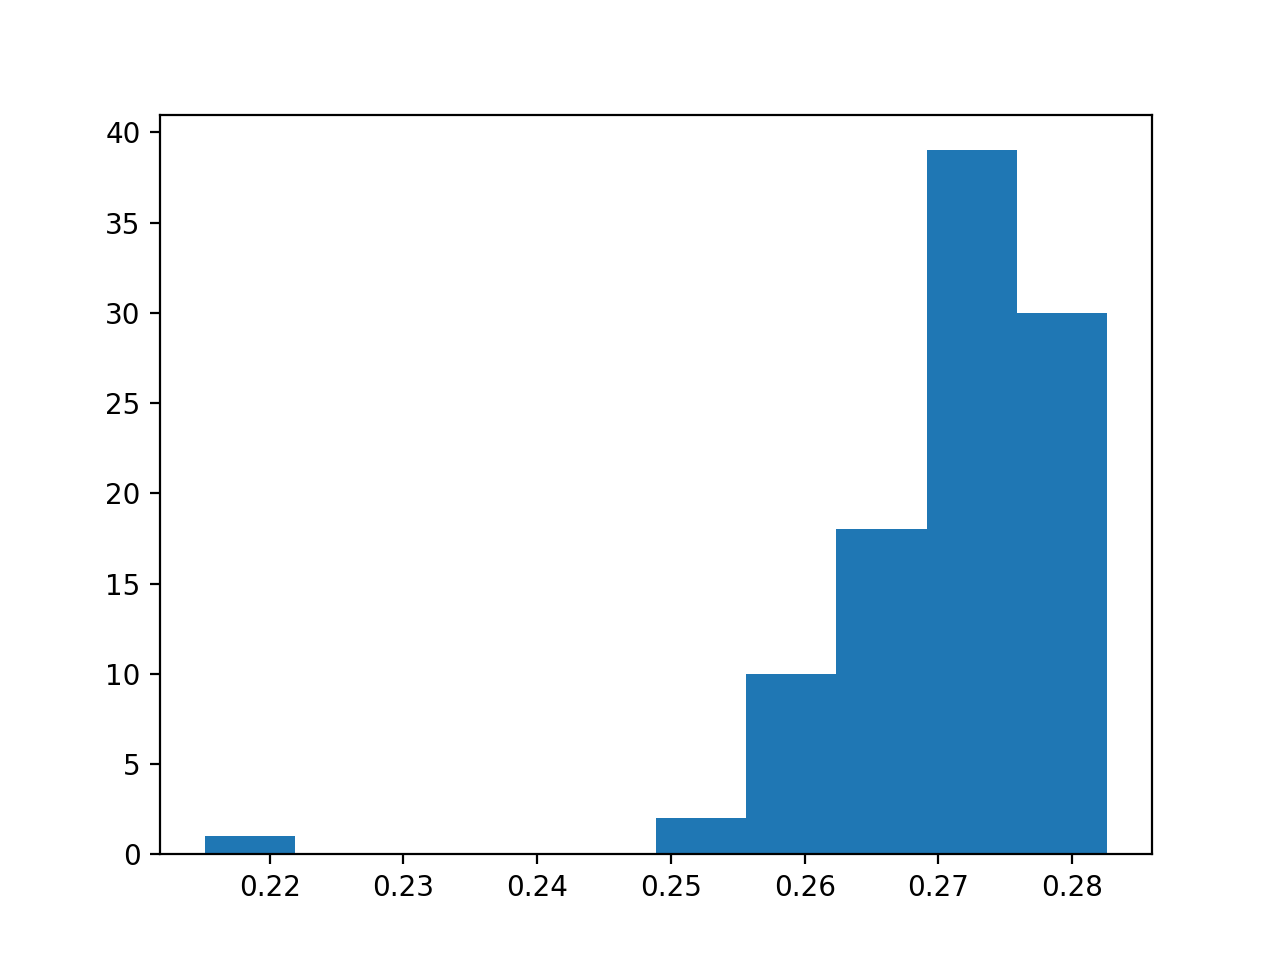

(array([ 1.,  0.,  0.,  0.,  0.,  2., 10., 18., 39., 30.]),
 array([0.21517  , 0.2219125, 0.228655 , 0.2353975, 0.24214  , 0.2488825,
        0.255625 , 0.2623675, 0.26911  , 0.2758525, 0.282595 ]),
 <a list of 10 Patch objects>)

In [14]:
plt.figure()
plt.hist(sampler.acceptance_fraction)

<IPython.core.display.Javascript object>


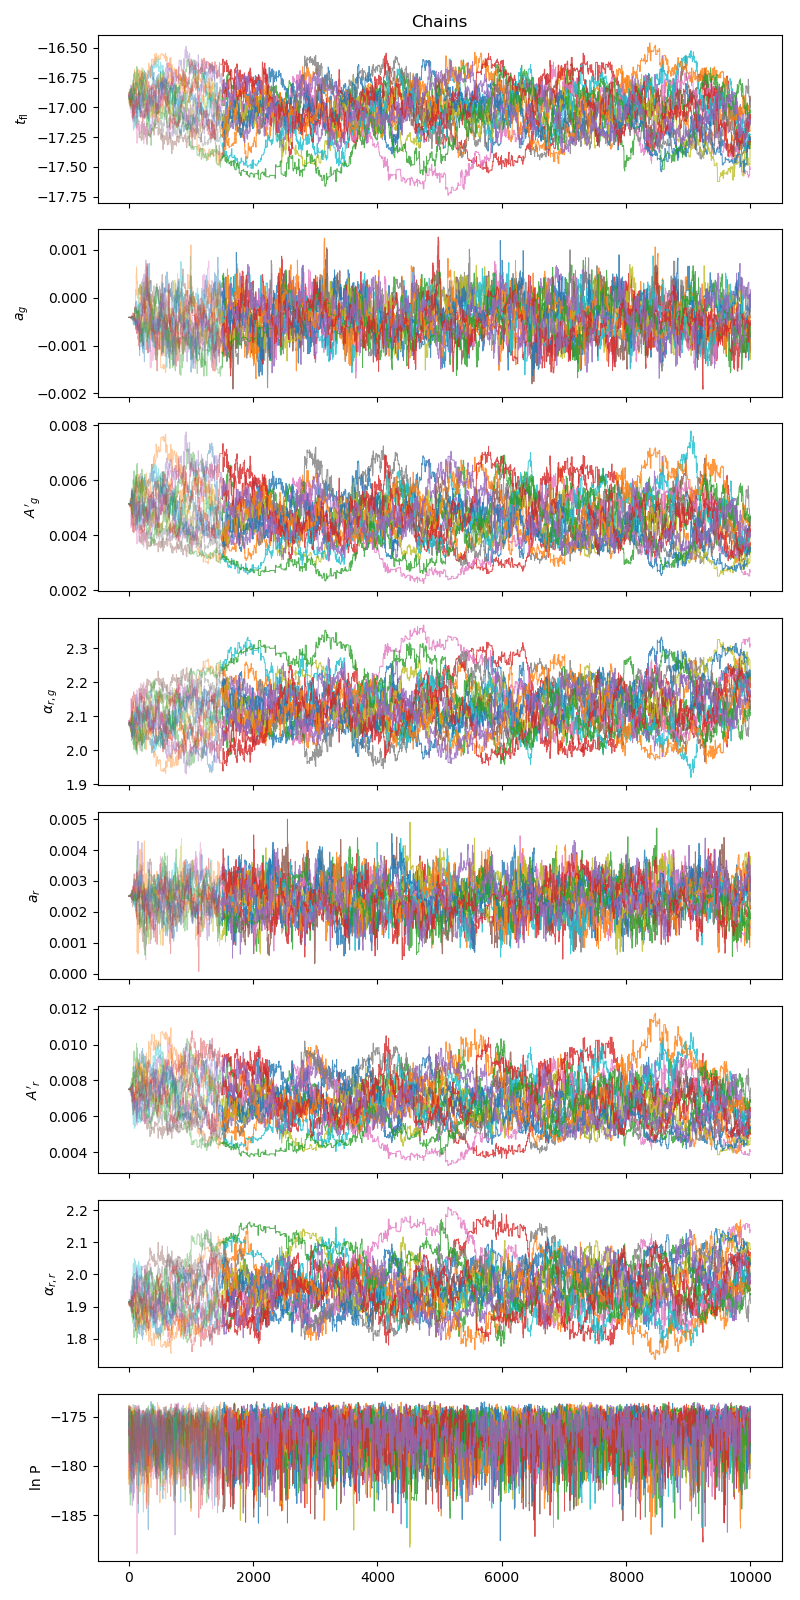

In [31]:
plotChains(sampler, 1500, gr_paramsNames, nplot=15)
plt.tight_layout()

<IPython.core.display.Javascript object>


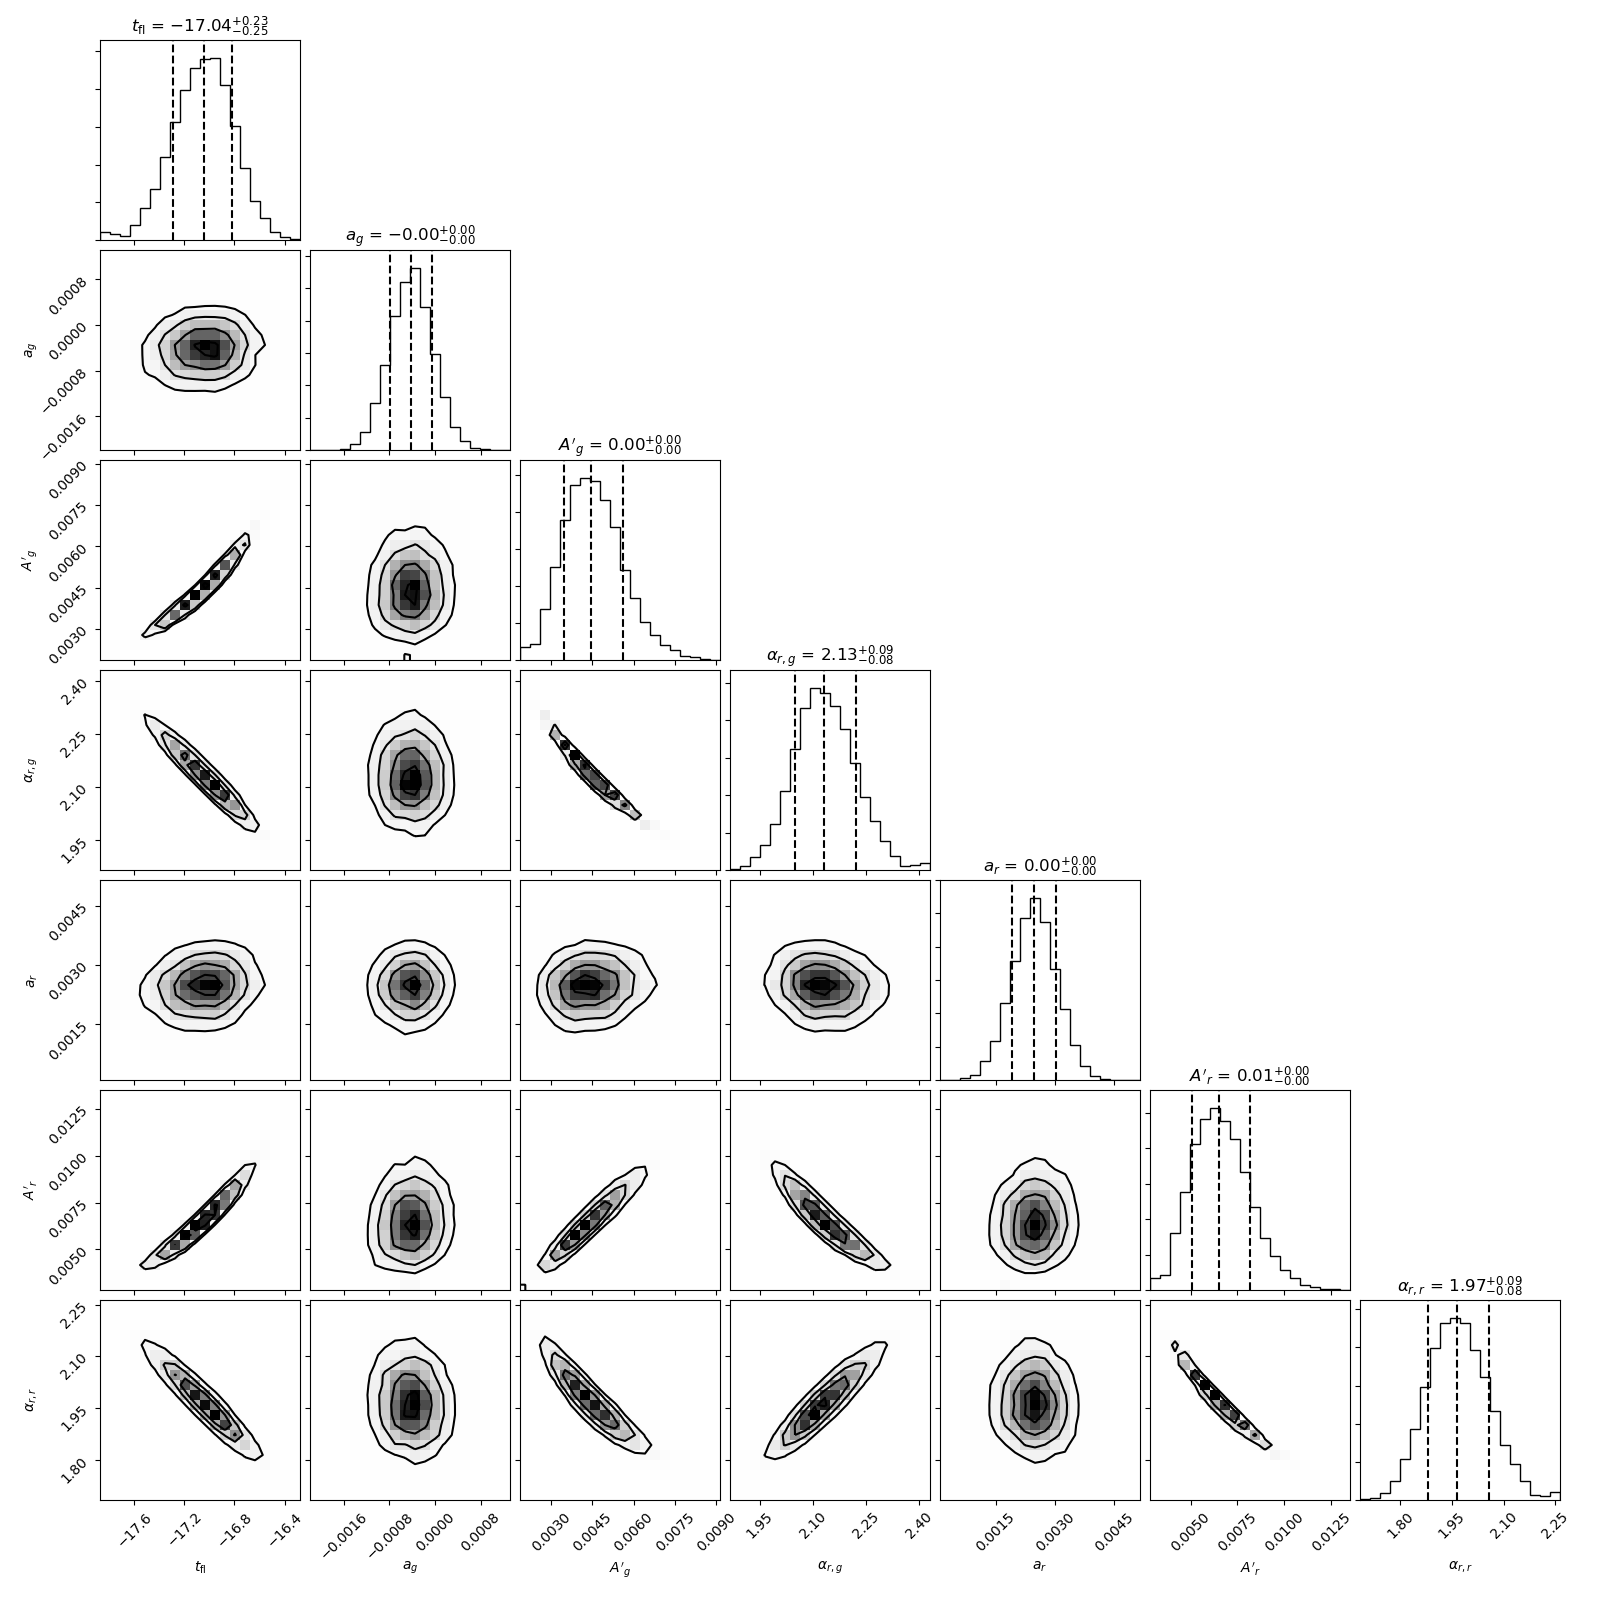

In [32]:
makeCorner(sampler, 2500, gr_paramsNames)

### Notes on parallelization

It appears that using multiple cores does not provide a significant speed up in performance.

Below are some stored results and plots from running on quest with a different number of processors

In [67]:
# while not storing results
ncores = np.array([2, 4, 5, 5, 5, 5, 6, 6, 6, 7, 8, 10, 15, 20, 26])
tot_time = np.array([13993.50, 5192.63, 10233.39, 14400, 14400, 7692.74, 8240.39, 8080.49, 1522.20, 9541.60, 8611.35, 12488.45, 13651.56, 6197.13, 2715.01])
nsteps = np.array([1000000, 500000, 1000000, 516349, 528754, 1000000, 1000000, 1000000, 200000, 1000000, 1000000, 1000000, 1000000, 500000, 200000])
cpu_eff = np.array([87, 74, 70, 53, 53, 73, 66, 68, 64, 65, 65, 61, 40, 33, 21])
mem_use = np.array([6.47, 6.60, 6.85, 3.41, 3.41, 6.67, 6.95, 6.94, 2.07, 7.1, 7.11, 7.39, 8.02, 8.51, 4.41])
mem_eff = np.array([22, 22, 24, 11.65, 11.65, 23, 24, 24, 7, 25, 25, 25, 27, 29, 5])

In [31]:
d_ncores = np.array([3, 4, 6, 8])
d_tot_time = np.array([10699.64, 4964.63, 9989.93, 7693.95])
d_nsteps = np.array([750000, 500000, 1000000, 1000000])
d_cpu_eff = np.array([78, 80, 67, 68])
d_mem_use = np.array([6.94, 7.06, 7.60, 8.15])
d_mem_eff = np.array([24, 24, 26, 28])

In [78]:
# using thin_by = 100
ncores = np.array([3, 4, 5, 6, 7, 8])
tot_time = np.array([10657.04, 12455.27, 9726.25, 6716.09, 10743.65, 10812.20])
nsteps = np.array([900000, 800000, 800000, 500000, 800000, 600000])
cpu_eff = np.array([63, 47, 54, 45, 40, 33])
mem_use = np.array([1, 1, 1, 1, 1, 1])
mem_eff = np.array([2, 2, 3, 3, 3, 4])

In [4]:
# using thin_by = 500
ncores = np.array([2, 3, 4, 5, 6, 7, 8, 10])
tot_time = np.array([1559.88, 1455.93, 1050.50, 965.94, 890.68, 851.89, 991.74, 1488.30])
nsteps = np.array([100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000])
cpu_eff = np.array([81, 61, 63, 64, 62, 59, 57, 59])
mem_use = np.array([1, 1, 1, 1, 1, 1, 1, 1])
mem_eff = np.array([1, 2, 2, 2, 3, 3, 4, 4])

In [74]:
# rerun with no thin_by and no storage
ncores = np.array([2, 3, 4, 5, 6, 7, 8, 12, 16])
tot_time = np.array([2287.98, 1241.54, 1038.46, 894.54, 893.08, 783.83, 1362.39, 1464.66, 2121.96])
nsteps = np.array([100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000])
cpu_eff = np.array([66, 75, 70, 66, 62, 64, 62, 54, 38])
mem_use = np.array([1, 1, 1, 1, 1, 1, 1, 1.5, 2])
mem_eff = np.array([1, 2, 2, 3, 3, 3, 4, 5, 7])

In [16]:
# using thin_by = 500 and ZTF18abxxssh (702 obs)
ncores = np.array([2, 3, 4, 5, 6, 7, 8, 10])
tot_time = np.array([1554.22, 1016.15, 845.92, 794.48, 670.84, 863.17, 983.31, 1179.83])
nsteps = np.array([50000])
cpu_eff = np.array([80, 79, 74, 70, 68, 62, 60, 60])
mem_use = np.array([1, 1, 1, 1, 1, 1, 1, 1])
mem_eff = np.array([1, 2, 2, 2, 3, 3, 4, 4])

In [14]:
# using thin_by = 500 and ZTF18aaqnrum (110 obs)
ncores = np.array([2, 3, 4, 5, 6, 7, 8, 12])
tot_time = np.array([1288.44, 1063.12, 966.28, 747.86, 779.72, 728.91, 859.55, 1290.64])
nsteps = np.array([100000])
cpu_eff = np.array([77, 70, 65, 66, 62, 62, 61, 51])
mem_use = np.array([1, 1, 1, 1, 1, 1, 1, 2])
mem_eff = np.array([1, 2, 2, 2, 3, 3, 4, 5])

In [18]:
# using thin_by = 500 and ZTF18aailmnv (506 obs)
ncores = np.array([2, 3, 4, 5, 6, 7, 8, 12])
tot_time = np.array([2215.58, 1778.02, 1425.01, 1364.36, 1173.55, 1453.12, 1668.66, 2102.35])
nsteps = np.array([100000])
cpu_eff = np.array([87, 78, 76, 69, 67, 62, 61, 55])
mem_use = np.array([1, 1, 1, 1, 1, 1, 1, 2])
mem_eff = np.array([1, 2, 2, 2, 3, 3, 4, 5])

In [ ]:
# using thin_by = 500 
ncores = np.array([])
tot_time = np.array([])
nsteps = np.array([])
cpu_eff = np.array([])
mem_use = np.array([])
mem_eff = np.array([])

<IPython.core.display.Javascript object>


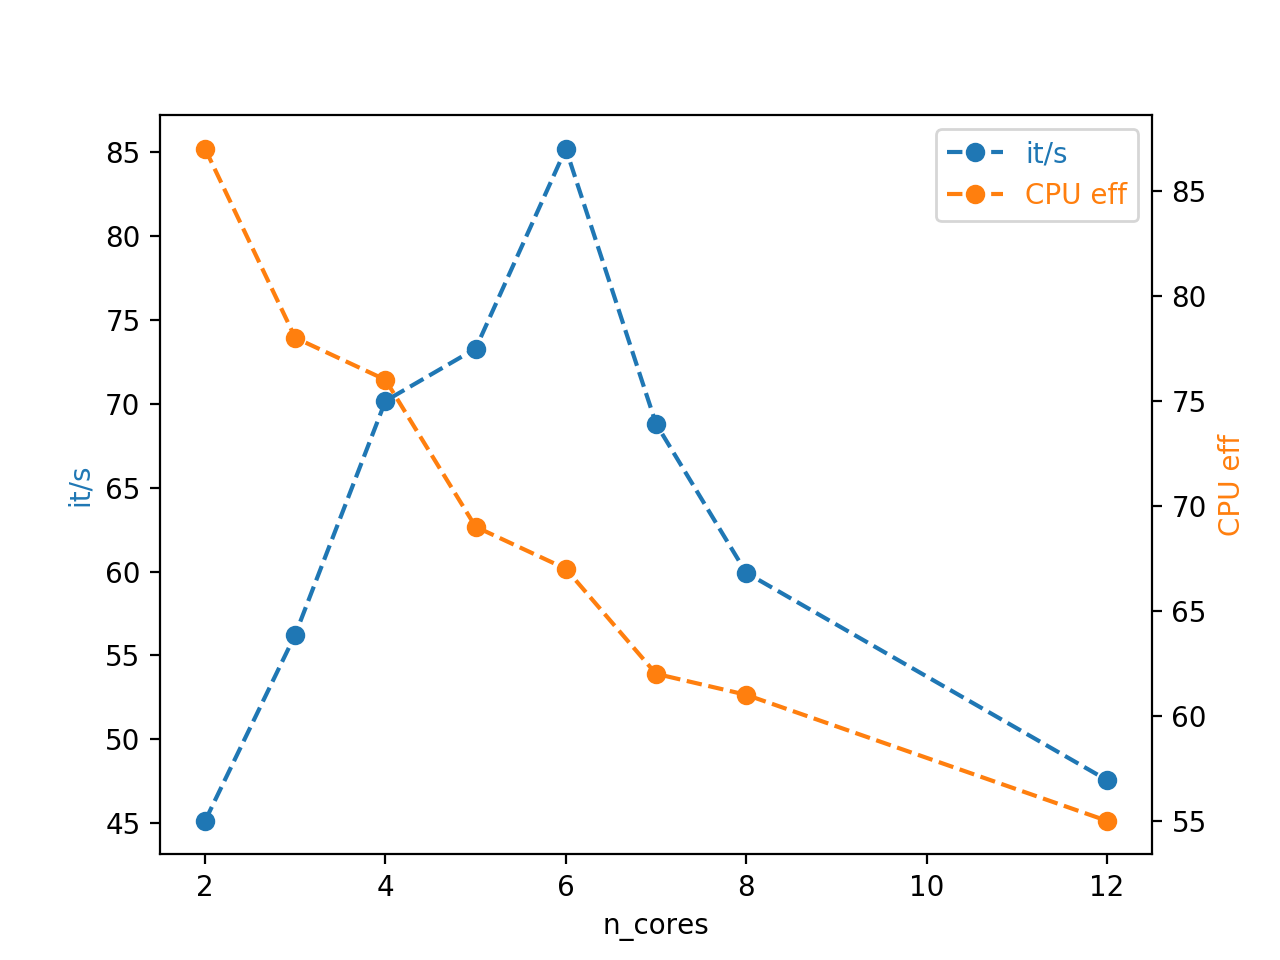

In [19]:
from mpl_toolkits.axes_grid1 import host_subplot
plt.figure()
host = host_subplot(111)

par = host.twinx()

host.set_xlabel("n_cores")
host.set_ylabel("it/s")
par.set_ylabel("CPU eff")

p1, = host.plot(ncores, nsteps/tot_time, 'o--', label="it/s")
p2, = par.plot(ncores, cpu_eff, 'o--', label="CPU eff")
# p1_d, = host.plot(d_ncores, d_nsteps/d_tot_time, 
#                   'd-', c = 'C0', mfc='none', mec='C0', mew=1)
# p1_2, = par.plot(d_ncores, d_cpu_eff, 
#                   'd-', c = 'C1', mfc='none', mec='C1', mew=1)

leg = plt.legend()

host.yaxis.get_label().set_color(p1.get_color())
leg.texts[0].set_color(p1.get_color())

par.yaxis.get_label().set_color(p2.get_color())
leg.texts[1].set_color(p2.get_color())

plt.show()


<IPython.core.display.Javascript object>


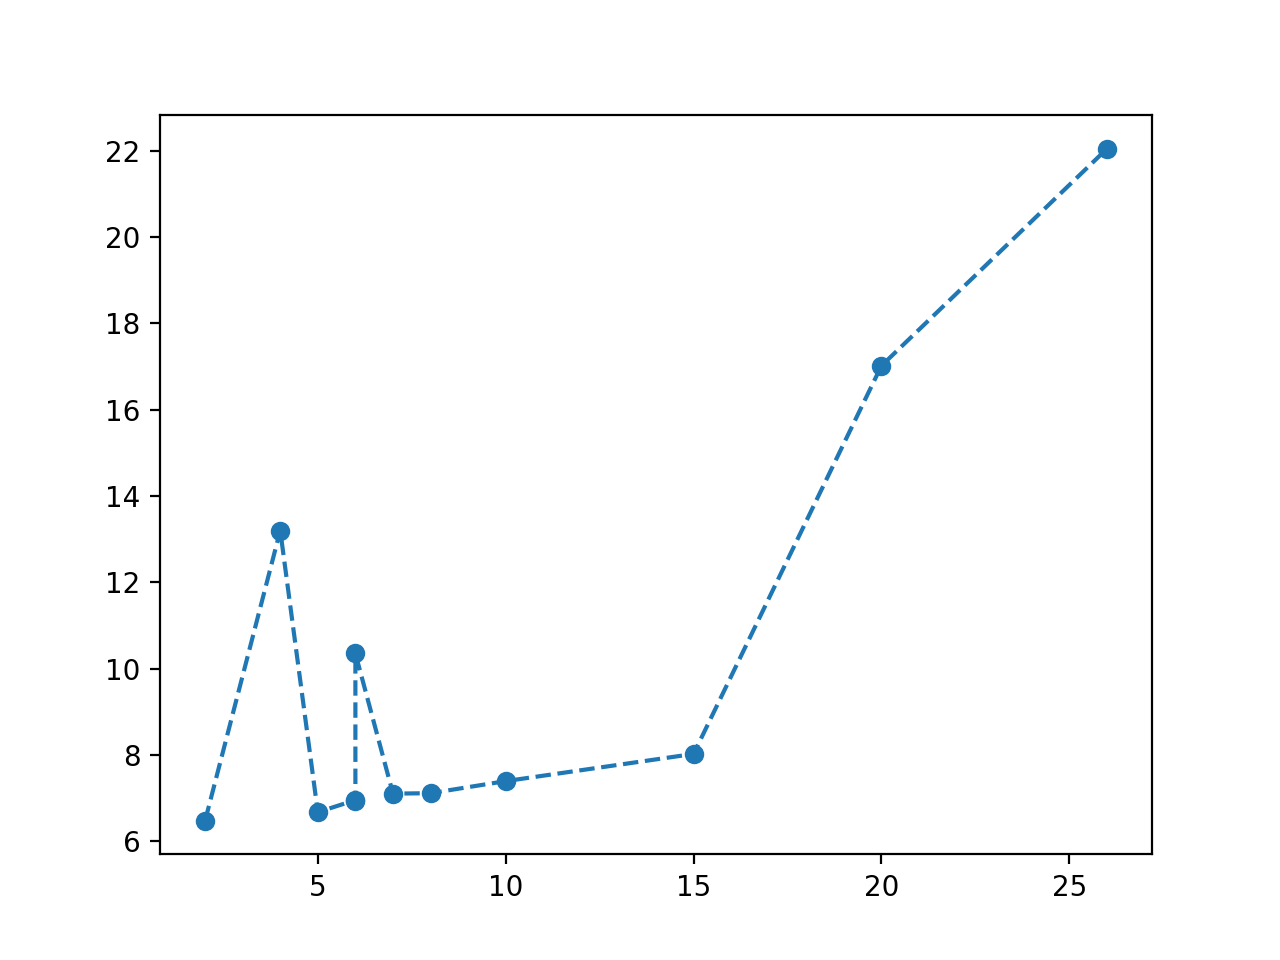

In [70]:
fig, ax = plt.subplots()
ax.plot(ncores, mem_use*1e6/nsteps, 'o--')

In [22]:
#define funtion to make corner plot
def makeCorner(sampler, nburn, paramsNames, quantiles=[0.16, 0.5, 0.84], truths=[]):
    samples = sampler.get_chain(discard=nburn, flat=True)
    if len(truths) > 0:
        f = corner.corner(samples, labels = paramsNames, quantiles = quantiles, 
                          truths=truths, plot_datapoints=False)
    else:
        f = corner.corner(samples, labels = paramsNames, quantiles = quantiles, 
                          show_titles=True, plot_datapoints=False)
    
#define function to plot walker chains  
def plotChains(sampler, nburn, paramsNames, nplot=nwalkers):
    Nparams = len(paramsNames)
    fig, ax = plt.subplots(Nparams+1,1, figsize = (8,2*(Nparams+1)), sharex = True)
    fig.subplots_adjust(hspace = 0)
    ax[0].set_title('Chains')
    xplot = np.arange(sampler.get_chain().shape[0])

    selected_walkers = np.random.choice(range(sampler.get_chain().shape[1]), nplot, replace=False)
    for i,p in enumerate(paramsNames):
        for w in selected_walkers:
            burn = ax[i].plot(xplot[:nburn], sampler.get_chain()[:nburn,w,i], 
                              alpha = 0.4, lw = 0.7, zorder = 1)
            ax[i].plot(xplot[nburn:], sampler.get_chain(discard=nburn)[:,w,i], 
                       color=burn[0].get_color(), alpha = 0.8, lw = 0.7, zorder = 1)
            
            ax[i].set_ylabel(p)
            if i==Nparams-1:
                ax[i+1].plot(xplot[:nburn], sampler.get_log_prob()[:nburn,w], 
                             color=burn[0].get_color(), alpha = 0.4, lw = 0.7, zorder = 1)
                ax[i+1].plot(xplot[nburn:], sampler.get_log_prob(discard=nburn)[:,w], 
                             color=burn[0].get_color(), alpha = 0.8, lw = 0.7, zorder = 1)
                ax[i+1].set_ylabel('ln P')
            
    return ax

paramsNames=[r'$t_\mathrm{fl}$', 
             '$a_g$', r"$A'_g$", r'$\alpha_{r, g}$']
gr_paramsNames=[r'$t_\mathrm{fl}$', 
             '$a_g$', r"$A'_g$", r'$\alpha_{r, g}$', 
             '$a_r$', r"$A'_r$", r'$\alpha_{r, r}$']
